# Setup

In [1]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *
from sklearn.model_selection import train_test_split


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

path_prefix = "./../../data/experiment_output/fair_irl_covariate_shift"

# Experiment Parameters

In [14]:
base_exp_info = {
    'N_TRIALS': 1,
    'EXPERIMENT_NAME': 'behavior_cloning_13',
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
#         'TNRPar',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'TNRPar',
        'PredPar',
        'OppPredPar',
 ],
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': False,
    'USE_HIDDEN_FEATURES_TARGET': False,
    'N_EXPERT_DEMOS': 1,
    'N_DATASET_SAMPLES': 10000,
    'MIN_FREQ_FILL_PCT': 0.1,
    'RESTRICT_Y_ACTION': True,
    'IRL_METHOD': 'FairIRL',
    'METHOD': 'highs',
    'NOISE_FACTOR': 0.02,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 2,
    'NON_EXPERT_ALGOS': [
        'DummyNoisy',
        'Dummy',
    ],
    'EPSILON': 0.003,
    'IGNORE_RESULTS_EPSILON': np.inf,
    'MAX_ITER': 10,
    'ALLOW_NEG_WEIGHTS': False,
    'DOT_WEIGHTS_FEAT_EXP': True,
    'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
    'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
}

### All experiments

In [22]:
al_experiments = [
#     AL -> AL
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # AL -> CA
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # AL -> FL
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # AL -> IL
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # AL-> ME
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtTNRPar',
    },

    # AL -> NY
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # AL -> TX
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__AL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
]

ca_experiments = [
    # CA-> AL
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # CA-> CA
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # CA-> FL
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # CA-> IL
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # CA-> ME
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # CA-> NY
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # CA-> TX
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__CA',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
]

fl_experiments = [
    # FL-> AL
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # FL-> CA
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # FL-> FL
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # FL-> IL
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # FL-> ME
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # FL-> NY
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # FL-> TX
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__FL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
]

il_experiments = [
    # IL-> AL
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # IL-> CA
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # IL-> FL
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # IL-> ME
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # IL-> IL
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # IL-> NY
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # IL-> TX
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__IL',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
]

me_experiments = [
    # ME-> AL
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # ME-> CA
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # ME-> FL
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # ME-> IL
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # ME-> ME
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # ME-> NY
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # ME-> TX
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__ME',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
]

ny_experiments = [
    # NY-> AL
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # NY-> CA
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # NY-> FL
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # NY-> IL
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    # NY-> ME
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # NY-> NY
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # NY-> TX
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__NY',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
]

tx_experiments = [
    # TX-> AL
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__AL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # TX-> CA
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__CA',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # TX-> FL
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__FL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # TX-> IL
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__IL',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # TX-> ME
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__ME',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # TX-> NY
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__NY',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
    # TX-> TX
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'OptAcc',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtDemPar',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtEqOpp',
    },
    {
        'DATASET': 'ACSIncome__TX',
        'TARGET_DATASET': 'ACSIncome__TX',
        'EXPERT_ALGO': 'HardtTNRPar',
    },
]

# Run experiments

In [64]:
import time
experiment_sets = [
    al_experiments,
#     ca_experiments,
#     fl_experiments,
#     il_experiments,
#     me_experiments,
#     ny_experiments,
#     tx_experiments,
]

for exp_set_i, exp_set in enumerate(experiment_sets):
    print(f"Starting experiment SET {exp_set_i+1}/{len(experiment_sets)}")
    
    results = []
    for exp_i, experiment in enumerate(exp_set):
        print(f"Starting experiment {exp_i+1}/{len(exp_set)}")

        exp_info = dict(base_exp_info)

        for k in experiment:
            exp_info[k] = experiment[k]
            
        display(exp_info)

        objectives = []
        for obj_name in exp_info['FEAT_EXP_OBJECTIVE_NAMES']:
            objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
        feat_obj_set = ObjectiveSet(objectives)
        del objectives

        objectives = []
        for obj_name in exp_info['PERF_MEAS_OBJECTIVE_NAMES']:
            objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
        perf_obj_set = ObjectiveSet(objectives)
        del objectives


        #############
        # LOAD DATA #
        #############

        from sklearn.model_selection import train_test_split

        # Load train data (source domain)
        X_source, y_source, source_feature_types = generate_dataset(
            exp_info['DATASET'],
            n_samples=int(exp_info['N_DATASET_SAMPLES']/2),  # Divide by 2 so that source train is equal to the train in the target train
        )
        source_X_cols = (
            source_feature_types['boolean']
            + source_feature_types['categoric']
            + source_feature_types['continuous']
        )
        if exp_info['USE_HIDDEN_FEATURES_SOURCE']:
            source_X_cols += source_feature_types['hidden']
        _X_source = X_source[source_X_cols]

        # Load test data (target domain)
        X_target, y_target, target_feature_types = generate_dataset(
            exp_info['TARGET_DATASET'],
            n_samples=exp_info['N_DATASET_SAMPLES'],
        )
        target_X_cols = (
            target_feature_types['boolean']
            + target_feature_types['categoric']
            + target_feature_types['continuous']
        )
        if exp_info['USE_HIDDEN_FEATURES_TARGET']:
            target_X_cols += target_feature_types['hidden']
        _X_target = X_target[target_X_cols]

        
        # Train/test split target domain
        X_target_train, X_target_test, y_target_train, y_target_test = train_test_split(
            _X_target, y_target, test_size=.5)
        del _X_target, y_target


        ################
        # TRAIN MODELS #
        ################


        # Using FairIRL
        # Learn weights from source train. Build classifier on target train.
        # Predict on target test.
        ####################################################################


        # Learn weights using source domain train set
        _, _, _, _, df_irl, weights, t_hold, _ = run_trial_source_domain(
            exp_info,
            X=X_source,
            y=y_source,
            feature_types=source_feature_types,
        )

        # Compute optimal classifier on target domain train set
        _, _, _, _, clf_pol = run_trial_target_domain(
            exp_info,
            weights,
            t_hold,
            X=X_target_train,
            y=y_target_train,
            feature_types=target_feature_types,
        )

        # Predict on target domain test set
        df_test = pd.DataFrame(X_target_test)
        df_test['yhat'] = clf_pol.predict(df_test).astype(int)
        df_test['y'] = y_target_test
        # Show the learned policy prediction rates as a gut check
        display(df_test.groupby(['z'])[['yhat']].agg(['count', 'mean']))
        perf_meas = perf_obj_set.compute_demo_feature_exp(df_test)

        # Persist results
        result = {}
        result['METHOD'] = 'FairIRL'
        result['EXPERT_ALGO'] = exp_info['EXPERT_ALGO']
        for i, obj_name in enumerate(exp_info['PERF_MEAS_OBJECTIVE_NAMES']):
            result = dict(result)
            result['METRIC_NAME'] = obj_name
            result['METRIC_VALUE'] = perf_meas[i]
            result['DATASET'] = exp_info['DATASET']
            result['TARGET_DATASET'] = exp_info['TARGET_DATASET']
            results.append(result)
#             print(f"Results of {result['METHOD']}")
#             display(result)


        # Using model trained on source
        # Train model on source train. Predict on target test.
        ######################################################
        expert_algo_lookup = generate_expert_algo_lookup(source_feature_types)
        expert_algo = expert_algo_lookup[exp_info['EXPERT_ALGO']]
        # Fit classifier on source train set
        expert_algo.fit(_X_source, y_source)
        # Predict on target domain test set
        df_test = pd.DataFrame(X_target_test)
        df_test['yhat'] = expert_algo.predict(df_test).astype(int)
        df_test['y'] = y_target_test
        # Show the learned policy prediction rates as a gut check
        display(df_test.groupby(['z'])[['yhat']].agg(['count', 'mean']))
        perf_meas = perf_obj_set.compute_demo_feature_exp(df_test)
        del expert_algo


        # Persist results
        result = {}
        result['METHOD'] = 'SourceClassifier'
        result['EXPERT_ALGO'] = exp_info['EXPERT_ALGO']
        for i, obj_name in enumerate(exp_info['PERF_MEAS_OBJECTIVE_NAMES']):
            result = dict(result)
            result['METRIC_NAME'] = obj_name
            result['METRIC_VALUE'] = perf_meas[i]
            result['DATASET'] = exp_info['DATASET']
            result['TARGET_DATASET'] = exp_info['TARGET_DATASET']
            results.append(result)
#             print(f"Results of {result['METHOD']}")
#             display(result)


        # Compare against threshold optimzer trained directly on test domain
        # Train model on target train. Predict on target test.
        ####################################################################
        expert_algo_lookup = generate_expert_algo_lookup(target_feature_types)
        expert_algo = expert_algo_lookup[exp_info['EXPERT_ALGO']]
        # Fit classifier on target domain train set
        expert_algo.fit(X_target_train, y_target_train)
        # Predict on target domain test set
        df_test = pd.DataFrame(X_target_test)
        df_test['yhat'] = expert_algo.predict(df_test).astype(int)
        df_test['y'] = y_target_test
        # Show the learned policy prediction rates as a gut check
        display(df_test.groupby(['z'])[['yhat']].agg(['count', 'mean']))
        perf_meas = perf_obj_set.compute_demo_feature_exp(df_test)
        del expert_algo

        # Persist results
        #################
        result = {}
        result['METHOD'] = 'ClassifierTrainedOnTest'
        result['EXPERT_ALGO'] = exp_info['EXPERT_ALGO']
        for i, obj_name in enumerate(exp_info['PERF_MEAS_OBJECTIVE_NAMES']):
            result = dict(result)
            result['METRIC_NAME'] = obj_name
            result['METRIC_VALUE'] = perf_meas[i]
            result['DATASET'] = exp_info['DATASET']
            result['TARGET_DATASET'] = exp_info['TARGET_DATASET']
            results.append(result)
#             print(f"Results of {result['METHOD']}")
#             display(result)
            
            
        # Using behavior cloning
        # Train model on source train. Predict on target test.
        ######################################################
        
        # Fit classifier on source train set
        beh_clone_clf = run_behavior_clone_experiment(
            exp_info,
            source_X=_X_source,
            source_y=y_source,
            source_feature_types=source_feature_types,
        )
        # Predict on target domain test set
        df_test = pd.DataFrame(X_target_test)
        df_test['yhat'] = beh_clone_clf.predict(df_test).astype(int)
        df_test['y'] = y_target_test
        # Show the learned policy prediction rates as a gut check
        display(df_test.groupby(['z'])[['yhat']].agg(['count', 'mean']))
        perf_meas = perf_obj_set.compute_demo_feature_exp(df_test)

        # Persist results
        result = {}
        result['METHOD'] = 'BehaviorCloning'
        result['EXPERT_ALGO'] = exp_info['EXPERT_ALGO']
        for i, obj_name in enumerate(exp_info['PERF_MEAS_OBJECTIVE_NAMES']):
            result = dict(result)
            result['METRIC_NAME'] = obj_name
            result['METRIC_VALUE'] = perf_meas[i]
            result['DATASET'] = exp_info['DATASET']
            result['TARGET_DATASET'] = exp_info['TARGET_DATASET']
            results.append(result)
#             print(f"Results of {result['METHOD']}")
#             display(result)


    # Store results in CSV
    results_df = pd.DataFrame(results)
    timestamp = datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S')
    results_df.to_csv(f"{path_prefix}/{timestamp}.csv")
    time.sleep(1)  # Sleep for one second since I think there's an issue with `results` variable being overwritten in subsequent iterations

Starting experiment SET 1/1
Starting experiment 1/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'EXPERT_ALGO': 'OptAcc'}

INFO:root:muE:
[[0.72954545 0.84858454 0.82029785]]
INFO:root:muE_hold:
[[0.7375     0.72186033 0.58972923]]
INFO:root:muE_perf_hold:
[[0.7375     0.72186033 0.58972923 0.8215159  0.99994439 0.92808174]]
INFO:root:muL:
[[0.4969697  0.98168757 0.88773679]
 [0.50984848 0.9732906  0.84678243]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.54 0.   0.  ]
INFO:root:		 Best mu_delta[0] 	= [0.19  0.849 0.82 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.192 0.709 0.571]
INFO:root:		 t[0] 		= 0.31217
INFO:root:		 t_hold[i] 	= 0.26743
INFO:root:		 weights[0] 	= [ 0.592 -0.336 -0.071]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.734 0.931 0.988]
INFO:root:		 Best mu_delta[1] 	= [-0.001 -0.021 -0.042]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.039 -0.061 -0.099]
INFO:root:		 t[1] 		= 0.01148
INFO:root:		 t_hold[i] 	= 0.03882
INFO:root:		 weights[1] 	= [ 0.727 -0.     0.273]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.730,0.849,0.820,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.497,0.982,0.888,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.510,0.973,0.847,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.540,0.000,0.000,0,0.540,0.545,0.545,0.000,0.013,0.013,0.000,0.019,0.019,0.545,0.013,0.019,0.011,1.000,0.976,0.0,2.0,0.592,-0.336,-0.071,0.312,0.267,0.0,0.0
4,0.734,0.931,0.988,0,0.734,0.699,0.699,0.931,0.967,0.967,0.988,0.984,0.984,0.699,0.967,0.984,0.994,0.857,0.882,0.0,3.0,0.727,-0.000,0.273,0.011,0.039,0.0,0.0
5,0.728,1.000,0.876,0,0.734,0.700,0.699,0.931,0.982,0.967,0.988,0.954,0.984,0.699,0.967,0.984,0.994,0.857,0.882,0.0,4.0,0.472,0.528,0.000,0.011,0.037,0.0,0.0
6,0.738,0.696,0.539,0,0.734,0.720,0.699,0.931,0.729,0.967,0.988,0.488,0.984,0.699,0.967,0.984,0.994,0.857,0.882,0.0,5.0,1.000,-0.000,-0.000,0.001,0.017,0.0,0.0


INFO:root:target domain muL = [0.75  0.745 0.72 ]
INFO:root:target domain muE = [0.736 0.738 0.749]
INFO:root:target domain muL_hold = [0.717 0.71  0.529]
INFO:root:target domain muL_perf_hold = [0.717 0.71  0.529 0.812 0.819 1.   ]


yhat          
  count      mean
z                
0  1160  0.118103
1  3840  0.376823

yhat          
  count      mean
z                
0  1160  0.053448
1  3840  0.302344

yhat          
  count      mean
z                
0  1160  0.109483
1  3840  0.275260

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.71666667 0.84362829 0.80767351]]
INFO:root:muE_hold:
[[0.7        0.84867307 0.61176471]]
INFO:root:muE_perf_hold:
[[0.7        0.84867307 0.61176471 0.94955113 0.43103448 0.95868545]]
INFO:root:muL:
[[0.50909091 0.97523427 0.94405402]
 [0.50454545 0.9294678  0.91485865]]
INFO:root:		 muL[0] = [0.739 0.828 0.816]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.717,0.844,0.808,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.509,0.975,0.944,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.505,0.929,0.915,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.739,0.828,0.816,0,0.739,0.694,0.694,0.828,0.802,0.802,0.816,0.683,0.683,0.694,0.802,0.683,0.881,0.729,0.911,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1160  0.134483
1  3840  0.294792

Starting experiment 2/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'EXPERT_ALGO': 'HardtDemPar'}

INFO:root:muE:
[[0.6780303  0.9609924  0.87222177]]
INFO:root:muE_hold:
[[0.7045     0.99853966 0.91486454]]
INFO:root:muE_perf_hold:
[[0.7045     0.99853966 0.91486454 0.99280846 0.98395062 0.85903985]]
INFO:root:muL:
[[0.50530303 0.98218742 0.98118974]
 [0.50606061 0.98286895 0.97218641]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.6   0.212 0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.079 0.749 0.872]
INFO:root:		 Best mu_delta_hold[i] 	= [0.107 0.699 0.891]
INFO:root:		 t[0] 		= 0.30544
INFO:root:		 t_hold[i] 	= 0.31385
INFO:root:		 weights[0] 	= [ 0.585 -0.074 -0.34 ]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.727 0.973 0.844]
INFO:root:		 Best mu_delta[1] 	= [-0.012 -0.003  0.028]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.004  0.098  0.048]
INFO:root:		 t[1] 		= 0.00903
INFO:root:		 t_hold[i] 	= 0.02573
INFO:root:		 weights[1] 	= [ 0.739  0.261 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.678,0.961,0.872,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.505,0.982,0.981,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.506,0.983,0.972,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.600,0.212,0.000,0,0.600,0.598,0.598,0.212,0.300,0.300,0.000,0.024,0.024,0.598,0.300,0.024,0.362,1.000,0.650,0.0,2.0,0.585,-0.074,-0.340,0.305,0.314,0.0,0.0
4,0.727,0.973,0.844,0,0.727,0.721,0.721,0.973,0.901,0.901,0.844,0.867,0.867,0.721,0.901,0.867,0.978,0.726,0.880,0.0,3.0,0.739,0.261,-0.000,0.009,0.026,0.0,0.0
5,0.731,0.937,0.994,0,0.727,0.734,0.721,0.973,0.827,0.901,0.844,0.820,0.867,0.721,0.901,0.867,0.978,0.726,0.880,0.0,4.0,0.359,0.000,0.641,0.018,0.031,0.0,0.0
6,0.731,0.937,0.994,0,0.727,0.734,0.721,0.973,0.827,0.901,0.844,0.820,0.867,0.721,0.901,0.867,0.978,0.726,0.880,0.0,5.0,0.854,0.035,0.111,0.011,0.007,0.0,0.0
7,0.715,0.993,0.997,0,0.715,0.712,0.712,0.993,0.970,0.970,0.997,0.823,0.823,0.712,0.970,0.823,0.924,0.571,0.905,0.0,6.0,0.500,0.436,0.065,0.006,0.014,0.0,0.0
8,0.716,0.994,0.998,0,0.727,0.716,0.721,0.973,0.944,0.901,0.844,0.799,0.867,0.721,0.901,0.867,0.978,0.726,0.880,0.0,7.0,0.162,0.603,0.235,0.007,0.028,0.0,0.0
9,0.727,0.973,0.844,0,0.727,0.721,0.721,0.973,0.901,0.901,0.844,0.867,0.867,0.721,0.901,0.867,0.978,0.726,0.880,0.0,8.0,0.379,0.611,0.010,0.005,0.017,0.0,0.0


INFO:root:target domain muL = [0.736 0.907 0.994]
INFO:root:target domain muE = [0.698 0.977 0.882]
INFO:root:target domain muL_hold = [0.718 0.886 0.752]
INFO:root:target domain muL_perf_hold = [0.718 0.886 0.752 0.973 0.702 0.943]


yhat          
  count      mean
z                
0  1197  0.171261
1  3803  0.282672

yhat          
  count      mean
z                
0  1197  0.334169
1  3803  0.351302

yhat          
  count      mean
z                
0  1197  0.022556
1  3803  0.022614

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.70151515 0.96291209 0.81392619]]
INFO:root:muE_hold:
[[0.65757576 0.92686164 0.9       ]]
INFO:root:muE_perf_hold:
[[0.65757576 0.92686164 0.9        0.87251829 0.46935484 0.76044747]]
INFO:root:muL:
[[0.525      0.9315868  0.94275081]
 [0.50151515 0.97640717 0.95602046]]
INFO:root:		 muL[0] = [0.729 0.799 0.72 ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.702,0.963,0.814,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.525,0.932,0.943,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.502,0.976,0.956,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.729,0.799,0.720,0,0.729,0.712,0.712,0.799,0.803,0.803,0.72,0.727,0.727,0.712,0.803,0.727,0.885,0.752,0.898,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1197  0.128655
1  3803  0.332369

Starting experiment 3/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'EXPERT_ALGO': 'HardtEqOpp'}

INFO:root:muE:
[[0.71212121 0.95138665 0.99189512]]
INFO:root:muE_hold:
[[0.7145     0.95691579 0.99445262]]
INFO:root:muE_perf_hold:
[[0.7145     0.95691579 0.99445262 0.9663868  0.95537326 0.84262324]]
INFO:root:muL:
[[0.49469697 0.96007332 0.8828725 ]
 [0.48636364 0.96125242 0.95332292]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.74  0.944 0.993]
INFO:root:		 Best mu_delta[0] 	= [-0.028  0.008 -0.001]
INFO:root:		 Best mu_delta_hold[i] 	= [0.004 0.057 0.071]
INFO:root:		 t[0] 		= 0.02275
INFO:root:		 t_hold[i] 	= 0.01065
INFO:root:		 weights[0] 	= [ 0.823 -0.036  0.141]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.45  0.979 0.956]
INFO:root:		Accuracy weight is zero, infinite error
INFO:root:		Accuracy weight is zero, infinite error
INFO:root:		 Best mu_delta[1] 	= [-0.007  0.008 -0.   ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.004 0.057 0.071]
INFO:root:		 t[1] 		= inf
INFO:root:		 t_hold[i] 	= inf
INFO:

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.712,0.951,0.992,1,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.495,0.960,0.883,0,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.486,0.961,0.953,0,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.740,0.944,0.993,0,0.74,0.711,0.711,0.944,0.900,0.9,0.993,0.923,0.923,0.711,0.9,0.923,0.938,0.841,0.862,0.0,2.0,0.823,-0.036,0.141,0.023,0.011,0.0,0.0
4,0.450,0.979,0.956,0,0.74,0.429,0.711,0.944,0.970,0.9,0.993,0.848,0.923,0.711,0.9,0.923,0.938,0.841,0.862,0.0,3.0,-0.000,0.639,0.361,inf,inf,0.0,0.0
5,0.731,0.968,0.956,0,0.74,0.701,0.711,0.944,0.930,0.9,0.993,0.898,0.923,0.711,0.9,0.923,0.938,0.841,0.862,0.0,4.0,0.032,0.617,0.350,0.005,0.038,0.0,0.0
6,0.730,0.988,0.999,0,0.74,0.702,0.711,0.944,0.959,0.9,0.993,0.995,0.923,0.711,0.9,0.923,0.938,0.841,0.862,0.0,5.0,0.020,0.465,0.514,0.004,0.000,0.0,0.0
7,0.740,0.944,0.993,0,0.74,0.711,0.711,0.944,0.900,0.9,0.993,0.923,0.923,0.711,0.9,0.923,0.938,0.841,0.862,0.0,6.0,0.003,0.000,0.997,0.000,0.000,0.0,0.0


INFO:root:target domain muL = [0.734 0.904 0.981]
INFO:root:target domain muE = [0.693 0.923 0.882]
INFO:root:target domain muL_hold = [0.709 0.943 0.874]
INFO:root:target domain muL_perf_hold = [0.709 0.943 0.874 0.993 0.696 0.897]


yhat          
  count      mean
z                
0  1172  0.160410
1  3828  0.223093

yhat          
  count      mean
z                
0  1172  0.037543
1  3828  0.086991

yhat          
  count      mean
z                
0  1172  0.040956
1  3828  0.077064

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.7030303  0.93783794 0.93960701]]
INFO:root:muE_hold:
[[0.67575758 0.90060024 0.96408046]]
INFO:root:muE_perf_hold:
[[0.67575758 0.90060024 0.96408046 0.89423959 0.75757576 0.82639208]]
INFO:root:muL:
[[0.48939394 0.98101312 0.94548287]
 [0.50984848 0.9609272  0.9105182 ]]
INFO:root:		 muL[0] = [0.7   0.948 0.844]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.703,0.938,0.940,1,0.0,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.489,0.981,0.945,0,0.0,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.510,0.961,0.911,0,0.0,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.700,0.948,0.844,0,0.7,0.697,0.697,0.948,0.95,0.95,0.844,0.844,0.844,0.697,0.95,0.844,0.975,0.615,0.834,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1172  0.051195
1  3828  0.001567

Starting experiment 4/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__AL',
 'EXPERT_ALGO': 'HardtTNRPar'}

INFO:root:muE:
[[0.70151515 0.86098081 0.60597826]]
INFO:root:muE_hold:
[[0.7205     0.89487674 0.74415205]]
INFO:root:muE_perf_hold:
[[0.7205     0.89487674 0.74415205 0.9988816  0.63024186 0.92267216]]
INFO:root:muL:
[[0.49545455 0.97470548 0.97540984]
 [0.51363636 0.99467356 0.98905603]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.537 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.164 0.861 0.606]
INFO:root:		 Best mu_delta_hold[i] 	= [0.165 0.883 0.725]
INFO:root:		 t[0] 		= 0.35791
INFO:root:		 t_hold[i] 	= 0.41810
INFO:root:		 weights[0] 	= [ 0.299 -0.165 -0.536]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.728 0.979 0.951]
INFO:root:		 Best mu_delta[1] 	= [-0.007 -0.029 -0.086]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.005 -0.021 -0.055]
INFO:root:		 t[1] 		= 0.01742
INFO:root:		 t_hold[i] 	= 0.01239
INFO:root:		 weights[1] 	= [0.415 0.585 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.701515,0.860981,0.605978,1
4,0.727750,0.978678,0.950501,0
5,0.727750,0.978678,0.950501,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.614 0.991 0.38 ]
INFO:root:		 Best mu_delta[4] 	= [ 0.087 -0.13   0.226]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.078  0.217]
INFO:root:		 t[4] 		= 0.12268
INFO:root:		 t_hold[i] 	= 0.10974
INFO:root:		 weights[4] 	= [ 0.074  0.449 -0.477]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.744 0.644 0.425]
INFO:root:		 Best mu_delta[5] 	= [-0.007 -0.029 -0.086]
INFO:root:		 Best mu_delta_hold[i] 	= [0.002 0.247 0.335]
INFO:root:		 t[5] 		= 0.00656
INFO:root:		 t_hold[i] 	= 0.00150
INFO:root:		 weights[5] 	= [ 1. -0. -0.]
INFO:root:	IRL Loop iteration 7/10 ...
INFO:root:		 muL[6] = [0.732 0.946 0.997]
INFO:root:		 Best mu_delta[6] 	= [-0.007 -0.029 -0.086]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.009 -0.036]
INFO:root:		 t[6] 		= 0.01290
INFO:root:		 t_hold[i] 	= 0.00487
INFO:root:		 weights[6] 	= [0.865 0.    0.135]
INFO:root:	IRL Loop iteration 8/10 ...
INFO:root:		 muL[7] = [0.744 0.753 0.612

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.702,0.861,0.606,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.495,0.975,0.975,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.514,0.995,0.989,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.537,0.000,0.000,0,0.537,0.555,0.555,0.000,0.012,0.012,0.000,0.019,0.019,0.555,0.012,0.019,0.010,1.000,1.000,0.0,2.0,0.299,-0.165,-0.536,0.358,0.418,0.0,0.0
4,0.728,0.979,0.951,0,0.728,0.716,0.716,0.979,0.979,0.979,0.951,0.964,0.964,0.716,0.979,0.964,0.971,0.790,0.919,0.0,3.0,0.415,0.585,0.000,0.017,0.012,0.0,0.0
5,0.728,0.979,0.951,0,0.728,0.716,0.716,0.979,0.979,0.979,0.951,0.964,0.964,0.716,0.979,0.964,0.971,0.790,0.919,0.0,4.0,0.153,0.847,0.000,0.025,0.018,0.0,0.0
6,0.728,0.979,0.951,0,0.728,0.716,0.716,0.979,0.979,0.979,0.951,0.964,0.964,0.716,0.979,0.964,0.971,0.790,0.919,0.0,5.0,0.153,0.847,-0.000,0.025,0.018,0.0,0.0
7,0.614,0.991,0.380,0,0.614,0.594,0.594,0.991,0.973,0.973,0.380,0.527,0.527,0.594,0.973,0.527,0.782,0.610,0.845,0.0,6.0,0.074,0.449,-0.477,0.123,0.110,0.0,0.0
8,0.744,0.644,0.425,0,0.728,0.719,0.716,0.979,0.648,0.979,0.951,0.409,0.964,0.716,0.979,0.964,0.971,0.790,0.919,0.0,7.0,1.000,-0.000,-0.000,0.007,0.001,0.0,0.0
9,0.732,0.946,0.997,0,0.728,0.720,0.716,0.979,0.930,0.979,0.951,0.888,0.964,0.716,0.979,0.964,0.971,0.790,0.919,0.0,8.0,0.865,0.000,0.135,0.013,0.005,0.0,0.0


INFO:root:target domain muL = [0.748 0.859 0.837]
INFO:root:target domain muE = [0.72  0.932 0.825]
INFO:root:target domain muL_hold = [0.714 0.861 0.792]
INFO:root:target domain muL_perf_hold = [0.714 0.861 0.792 0.925 0.82  0.903]


yhat          
  count      mean
z                
0  1183  0.081995
1  3817  0.212209

yhat          
  count      mean
z                
0  1183  0.168216
1  3817  0.277443

yhat          
  count      mean
z                
0  1183  0.236686
1  3817  0.322243

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.7        0.90806946 0.69238095]]
INFO:root:muE_hold:
[[0.71212121 0.88489089 0.60984848]]
INFO:root:muE_perf_hold:
[[0.71212121 0.88489089 0.60984848 0.98600548 0.5524957  0.96271706]]
INFO:root:muL:
[[0.49166667 0.94833427 0.84610938]
 [0.5219697  0.96106675 0.93730408]]
INFO:root:		 muL[0] = [0.729 0.809 0.702]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.700,0.908,0.692,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.492,0.948,0.846,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.522,0.961,0.937,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.729,0.809,0.702,0,0.729,0.753,0.753,0.809,0.884,0.884,0.702,0.807,0.807,0.753,0.884,0.807,0.966,0.731,0.912,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1183  0.120034
1  3817  0.272203

Starting experiment 5/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'EXPERT_ALGO': 'OptAcc'}

INFO:root:muE:
[[0.70530303 0.69396637 0.53321969]]
INFO:root:muE_hold:
[[0.73125    0.67390794 0.51643056]]
INFO:root:muE_perf_hold:
[[0.73125    0.67390794 0.51643056 0.78735388 0.97641233 0.94859223]]
INFO:root:muL:
[[0.50530303 0.96180243 0.9723365 ]
 [0.47878788 0.99462601 0.88526316]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.532 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.174 0.694 0.533]
INFO:root:		 Best mu_delta_hold[i] 	= [0.181 0.666 0.516]
INFO:root:		 t[0] 		= 0.32233
INFO:root:		 t_hold[i] 	= 0.31107
INFO:root:		 weights[0] 	= [ 0.258 -0.342 -0.4  ]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.716 0.987 0.886]
INFO:root:		 Best mu_delta[1] 	= [-0.003 -0.073 -0.088]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.    -0.079 -0.106]
INFO:root:		 t[1] 		= 0.02323
INFO:root:		 t_hold[i] 	= 0.02508
INFO:root:		 weights[1] 	= [0.684 0.316 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.705303,0.693966,0.533220,1
5,0.716000,0.987216,0.885693,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.634 0.79  0.274]
INFO:root:		 Best mu_delta[4] 	= [ 0.072 -0.096  0.259]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.085 -0.14   0.074]
INFO:root:		 t[4] 		= 0.10382
INFO:root:		 t_hold[i] 	= 0.05578
INFO:root:		 weights[4] 	= [ 0.355  0.27  -0.375]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.731 0.663 0.491]
INFO:root:		 Best mu_delta[5] 	= [-0.003 -0.073 -0.088]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.    -0.079 -0.106]
INFO:root:		 t[5] 		= 0.00267
INFO:root:		 t_hold[i] 	= 0.00025
INFO:root:		 weights[5] 	= [ 1. -0. -0.]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.286
INFO:root:best weight:	 [ 1. -0. -0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.694,0.533,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.505,0.962,0.972,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.479,0.995,0.885,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.532,0.000,0.000,0,0.532,0.550,0.550,0.000,0.008,0.008,0.000,0.000,0.000,0.550,0.008,0.000,0.010,1.000,0.665,0.0,2.0,0.258,-0.342,-0.400,0.322,0.311,0.0,0.0
4,0.716,0.987,0.886,0,0.716,0.731,0.731,0.987,0.992,0.992,0.886,0.940,0.940,0.731,0.992,0.940,0.950,0.754,0.874,0.0,3.0,0.684,0.316,0.000,0.023,0.025,0.0,0.0
5,0.716,0.987,0.886,0,0.716,0.731,0.731,0.987,0.992,0.992,0.886,0.940,0.940,0.731,0.992,0.940,0.950,0.754,0.874,0.0,4.0,0.386,0.614,-0.000,0.045,0.049,0.0,0.0
6,0.716,0.987,0.886,0,0.716,0.731,0.731,0.987,0.992,0.992,0.886,0.940,0.940,0.731,0.992,0.940,0.950,0.754,0.874,0.0,5.0,0.386,0.614,0.000,0.045,0.049,0.0,0.0
7,0.634,0.790,0.274,0,0.634,0.646,0.646,0.790,0.814,0.814,0.274,0.443,0.443,0.646,0.814,0.443,0.966,0.605,0.956,0.0,6.0,0.355,0.270,-0.375,0.104,0.056,0.0,0.0
8,0.731,0.663,0.491,0,0.716,0.746,0.731,0.987,0.694,0.992,0.886,0.488,0.940,0.731,0.992,0.940,0.950,0.754,0.874,0.0,7.0,1.000,-0.000,-0.000,0.003,0.000,0.0,0.0


INFO:root:target domain muL = [0.686 0.835 0.829]
INFO:root:target domain muE = [0.662 0.868 0.943]
INFO:root:target domain muL_hold = [0.651 0.826 0.735]
INFO:root:target domain muL_perf_hold = [0.651 0.826 0.735 0.918 0.826 0.986]


yhat          
  count      mean
z                
0  1894  0.226505
1  3106  0.402125

yhat          
  count      mean
z                
0  1894  0.057022
1  3106  0.297167

yhat          
  count      mean
z                
0  1894  0.261880
1  3106  0.386027

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.70227273 0.65931857 0.54445958]]
INFO:root:muE_hold:
[[0.72424242 0.76513461 0.49671053]]
INFO:root:muE_perf_hold:
[[0.72424242 0.76513461 0.49671053 0.87843486 0.60535714 0.99256357]]
INFO:root:muL:
[[0.51666667 0.98718366 0.84746779]
 [0.49166667 0.95817975 0.86136277]]
INFO:root:		 muL[0] = [0.726 0.663 0.499]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.702,0.659,0.544,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.517,0.987,0.847,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.492,0.958,0.861,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.726,0.663,0.499,0,0.726,0.749,0.749,0.663,0.736,0.736,0.499,0.577,0.577,0.749,0.736,0.577,0.835,0.886,0.98,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1894  0.062302
1  3106  0.350934

Starting experiment 6/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'EXPERT_ALGO': 'HardtDemPar'}

INFO:root:muE:
[[0.68333333 0.99802372 0.98996324]]
INFO:root:muE_hold:
[[0.704      0.99851737 0.93900329]]
INFO:root:muE_perf_hold:
[[0.704      0.99851737 0.93900329 0.99135792 0.91231446 0.83875965]]
INFO:root:muL:
[[0.47878788 0.9662987  0.9845341 ]
 [0.51060606 0.96637933 0.92915643]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.729 0.944 0.992]
INFO:root:		 Best mu_delta[0] 	= [-0.011  0.054 -0.001]
INFO:root:		 Best mu_delta_hold[i] 	= [0.003 0.062 0.011]
INFO:root:		 t[0] 		= 0.00984
INFO:root:		 t_hold[i] 	= 0.00804
INFO:root:		 weights[0] 	= [0.651 0.119 0.229]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.718 0.969 0.96 ]
INFO:root:		 Best mu_delta[1] 	= [-0.009  0.029  0.03 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.018 0.041 0.103]
INFO:root:		 t[1] 		= 0.02517
INFO:root:		 t_hold[i] 	= 0.03623
INFO:root:		 weights[1] 	= [0.076 0.88  0.045]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 muL[2] = [0.717 0.979 0.965]
INFO:root:		 Be

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.998,0.990,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.479,0.966,0.985,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.511,0.966,0.929,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.729,0.944,0.992,0,0.729,0.701,0.701,0.944,0.937,0.937,0.992,0.928,0.928,0.701,0.937,0.928,0.977,0.841,0.907,0.0,2.0,0.651,0.119,0.229,0.010,0.008,0.0,0.0
4,0.718,0.969,0.960,0,0.718,0.686,0.686,0.969,0.958,0.958,0.960,0.836,0.836,0.686,0.958,0.836,0.968,0.682,0.938,0.0,3.0,0.076,0.880,0.045,0.025,0.036,0.0,0.0
5,0.717,0.979,0.965,0,0.717,0.685,0.685,0.979,0.962,0.962,0.965,0.836,0.836,0.685,0.962,0.836,0.963,0.677,0.939,0.0,4.0,0.035,0.549,0.416,0.015,0.034,0.0,0.0
6,0.716,0.989,0.981,0,0.716,0.696,0.696,0.989,0.983,0.983,0.981,0.984,0.984,0.696,0.983,0.984,0.979,0.808,0.902,0.0,5.0,0.015,0.485,0.500,0.006,0.009,0.0,0.0
7,0.701,0.993,0.986,0,0.701,0.688,0.688,0.993,0.984,0.984,0.986,0.990,0.990,0.688,0.984,0.990,0.962,0.755,0.889,0.0,6.0,0.000,0.602,0.398,inf,inf,0.0,0.0
8,0.702,0.997,0.991,0,0.702,0.682,0.682,0.997,0.976,0.976,0.991,0.973,0.973,0.682,0.976,0.973,0.940,0.669,0.901,0.0,7.0,0.000,0.609,0.391,inf,inf,0.0,0.0
9,0.716,0.990,0.981,0,0.702,0.699,0.682,0.997,0.987,0.976,0.991,0.979,0.973,0.682,0.976,0.973,0.940,0.669,0.901,0.0,8.0,0.000,0.834,0.166,inf,inf,0.0,0.0


INFO:root:target domain muL = [0.676 0.933 0.938]
INFO:root:target domain muE = [0.64  0.923 0.901]
INFO:root:target domain muL_hold = [0.617 0.915 0.856]
INFO:root:target domain muL_perf_hold = [0.617 0.915 0.856 0.984 0.803 0.938]


yhat          
  count      mean
z                
0  1919  0.270453
1  3081  0.350211

yhat          
  count      mean
z                
0  1919  0.026055
1  3081  0.036676

yhat          
  count      mean
z                
0  1919  0.444502
1  3081  0.456994

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.70606061 0.99121661 0.88066814]]
INFO:root:muE_hold:
[[0.70909091 0.97515528 0.9875    ]]
INFO:root:muE_perf_hold:
[[0.70909091 0.97515528 0.9875     0.95274313 0.725      0.95882316]]
INFO:root:muL:
[[0.52878788 0.95966918 0.97859465]
 [0.47651515 0.96538199 0.95845272]]
INFO:root:		 muL[0] = [0.694 0.953 0.838]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.706,0.991,0.881,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.529,0.960,0.979,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.477,0.965,0.958,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.694,0.953,0.838,0,0.694,0.692,0.692,0.953,0.953,0.953,0.838,0.947,0.947,0.692,0.953,0.947,0.955,1.0,0.889,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1919  0.041688
1  3081  0.000000

Starting experiment 7/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'EXPERT_ALGO': 'HardtEqOpp'}

INFO:root:muE:
[[0.68257576 0.95989034 0.99080368]]
INFO:root:muE_hold:
[[0.71275    0.95703453 0.99553632]]
INFO:root:muE_perf_hold:
[[0.71275    0.95703453 0.99553632 0.96625278 0.98536751 0.87058596]]
INFO:root:muL:
[[0.49015152 0.99893206 0.96412776]
 [0.49090909 0.96941071 0.81940144]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.741 0.826 0.826]
INFO:root:		 Best mu_delta[0] 	= [-0.058  0.133  0.165]
INFO:root:		 Best mu_delta_hold[i] 	= [0.006 0.168 0.328]
INFO:root:		 t[0] 		= 0.05078
INFO:root:		 t_hold[i] 	= 0.04256
INFO:root:		 weights[0] 	= [ 0.745 -0.151  0.103]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.724 0.991 0.993]
INFO:root:		 Best mu_delta[1] 	= [-0.01  -0.008 -0.001]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.032 -0.003  0.099]
INFO:root:		 t[1] 		= 0.00410
INFO:root:		 t_hold[i] 	= 0.04439
INFO:root:		 weights[1] 	= [0.373 0.193 0.434]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.960,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.490,0.999,0.964,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.491,0.969,0.819,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.741,0.826,0.826,0,0.741,0.707,0.707,0.826,0.789,0.789,0.826,0.668,0.668,0.707,0.789,0.668,0.889,0.738,0.937,0.0,2.0,0.745,-0.151,0.103,0.051,0.043,0.0,0.0
4,0.724,0.991,0.993,0,0.724,0.681,0.681,0.991,0.970,0.970,0.993,0.897,0.897,0.681,0.970,0.897,0.967,0.689,0.884,0.0,3.0,0.373,0.193,0.434,0.004,0.044,0.0,0.0
5,0.398,0.583,0.994,0,0.724,0.401,0.681,0.991,0.590,0.970,0.993,0.878,0.897,0.681,0.970,0.897,0.967,0.689,0.884,0.0,4.0,-0.000,-0.000,1.000,inf,inf,0.0,0.0
6,0.737,0.938,0.998,0,0.724,0.691,0.681,0.991,0.914,0.970,0.993,0.873,0.897,0.681,0.970,0.897,0.967,0.689,0.884,0.0,5.0,0.472,0.097,0.431,0.005,0.045,0.0,0.0
7,0.710,0.982,0.964,0,0.724,0.686,0.681,0.991,0.975,0.970,0.993,0.965,0.897,0.681,0.970,0.897,0.967,0.689,0.884,0.0,6.0,0.000,0.133,0.867,inf,inf,0.0,0.0
8,0.726,0.977,0.978,0,0.724,0.686,0.681,0.991,0.937,0.970,0.993,0.873,0.897,0.681,0.970,0.897,0.967,0.689,0.884,0.0,7.0,0.004,0.368,0.628,0.003,0.019,0.0,0.0


INFO:root:target domain muL = [0.669 0.977 0.972]
INFO:root:target domain muE = [0.619 0.959 0.863]
INFO:root:target domain muL_hold = [0.642 0.982 0.987]
INFO:root:target domain muL_perf_hold = [0.642 0.982 0.987 0.997 0.904 0.911]


yhat          
  count      mean
z                
0  1947  0.386749
1  3053  0.424828

yhat          
  count      mean
z                
0  1947  0.025681
1  3053  0.062234

yhat          
  count      mean
z                
0  1947  0.299435
1  3053  0.316738

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.70757576 0.93366567 0.87028398]]
INFO:root:muE_hold:
[[0.70606061 0.93464118 0.93317972]]
INFO:root:muE_perf_hold:
[[0.70606061 0.93464118 0.93317972 0.94761441 0.95555556 0.80818308]]
INFO:root:muL:
[[0.51742424 0.95839196 0.93333333]
 [0.50454545 0.97244147 0.90454545]]
INFO:root:		 muL[0] = [0.731 0.878 0.856]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.708,0.934,0.870,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.517,0.958,0.933,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.505,0.972,0.905,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.731,0.878,0.856,0,0.731,0.685,0.685,0.878,0.862,0.862,0.856,0.796,0.796,0.685,0.862,0.796,0.918,0.761,0.886,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1947  0.139188
1  3053  0.214543

Starting experiment 8/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__CA',
 'EXPERT_ALGO': 'HardtTNRPar'}

INFO:root:muE:
[[0.69848485 0.87827251 0.75242938]]
INFO:root:muE_hold:
[[0.71       0.91330245 0.78620748]]
INFO:root:muE_perf_hold:
[[0.71       0.91330245 0.78620748 0.97912348 0.66102958 0.93098858]]
INFO:root:muL:
[[0.52348485 0.95385245 0.92431399]
 [0.49848485 0.98572236 0.94082002]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.539 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.16  0.878 0.752]
INFO:root:		 Best mu_delta_hold[i] 	= [0.143 0.913 0.786]
INFO:root:		 t[0] 		= 0.35041
INFO:root:		 t_hold[i] 	= 0.36404
INFO:root:		 weights[0] 	= [ 0.414 -0.179 -0.407]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.724 0.982 0.854]
INFO:root:		 Best mu_delta[1] 	= [-0.006 -0.026 -0.025]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.01  -0.01  -0.049]
INFO:root:		 t[1] 		= 0.01047
INFO:root:		 t_hold[i] 	= 0.00732
INFO:root:		 weights[1] 	= [ 0.628  0.372 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.698,0.878,0.752,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.523,0.954,0.924,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.498,0.986,0.941,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.539,0.000,0.000,0,0.539,0.567,0.567,0.000,0.000,0.000,0.000,0.000,0.000,0.567,0.000,0.000,0.000,1.000,1.000,0.0,2.0,0.414,-0.179,-0.407,0.35,0.364,0.0,0.0
4,0.724,0.982,0.854,0,0.724,0.700,0.700,0.982,0.954,0.954,0.854,0.981,0.981,0.700,0.954,0.981,0.896,0.683,0.907,0.0,3.0,0.628,0.372,-0.000,0.01,0.007,0.0,0.0
5,0.675,0.984,0.987,0,0.724,0.658,0.700,0.982,0.975,0.954,0.854,0.917,0.981,0.700,0.954,0.981,0.896,0.683,0.907,0.0,4.0,0.000,1.000,0.000,inf,inf,0.0,0.0
6,0.690,1.000,1.000,0,0.724,0.695,0.700,0.982,1.000,0.954,0.854,1.000,0.981,0.700,0.954,0.981,0.896,0.683,0.907,0.0,5.0,0.000,1.000,0.000,inf,inf,0.0,0.0
7,0.690,1.000,1.000,0,0.724,0.695,0.700,0.982,1.000,0.954,0.854,1.000,0.981,0.700,0.954,0.981,0.896,0.683,0.907,0.0,6.0,0.000,1.000,0.000,inf,inf,0.0,0.0
8,0.456,0.988,0.790,0,0.724,0.467,0.700,0.982,0.985,0.954,0.854,0.880,0.981,0.700,0.954,0.981,0.896,0.683,0.907,0.0,7.0,-0.000,1.000,-0.000,inf,inf,0.0,0.0
9,0.724,0.982,0.854,0,0.724,0.700,0.700,0.982,0.954,0.954,0.854,0.981,0.981,0.700,0.954,0.981,0.896,0.683,0.907,0.0,8.0,0.239,0.761,-0.000,0.02,0.008,0.0,0.0


INFO:root:target domain muL = [0.664 0.996 0.988]
INFO:root:target domain muE = [0.589 0.97  0.874]
INFO:root:target domain muL_hold = [0.611 0.986 0.989]
INFO:root:target domain muL_perf_hold = [0.611 0.986 0.989 0.949 0.856 0.944]


yhat          
  count      mean
z                
0  1874  0.270544
1  3126  0.284709

yhat          
  count      mean
z                
0  1874  0.247065
1  3126  0.337172

yhat          
  count      mean
z                
0  1874  0.257204
1  3126  0.366923

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.70909091 0.88904795 0.76969697]]
INFO:root:muE_hold:
[[0.67878788 0.88740146 0.75093867]]
INFO:root:muE_perf_hold:
[[0.67878788 0.88740146 0.75093867 0.97560484 0.64253394 0.90753981]]
INFO:root:muL:
[[0.48939394 0.99886942 0.88920455]
 [0.50075758 0.98210654 0.8812279 ]]
INFO:root:		 muL[0] = [0.734 0.78  0.642]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.709,0.889,0.770,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.489,0.999,0.889,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.501,0.982,0.881,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.734,0.780,0.642,0,0.734,0.724,0.724,0.78,0.789,0.789,0.642,0.69,0.69,0.724,0.789,0.69,0.858,0.587,0.897,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1874  0.023479
1  3126  0.233205

Starting experiment 9/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'EXPERT_ALGO': 'OptAcc'}

INFO:root:muE:
[[0.71742424 0.65661951 0.45214286]]
INFO:root:muE_hold:
[[0.7475     0.65603514 0.48925294]]
INFO:root:muE_perf_hold:
[[0.7475     0.65603514 0.48925294 0.77773704 0.98131847 0.94953083]]
INFO:root:muL:
[[0.49621212 0.92386025 0.82744957]
 [0.52878788 0.907744   0.83626202]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.528 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.19  0.657 0.452]
INFO:root:		 Best mu_delta_hold[i] 	= [0.205 0.644 0.471]
INFO:root:		 t[0] 		= 0.29391
INFO:root:		 t_hold[i] 	= 0.29833
INFO:root:		 weights[0] 	= [ 0.229 -0.305 -0.466]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.728 0.996 0.865]
INFO:root:		 Best mu_delta[1] 	= [-0.003 -0.085 -0.103]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.035 -0.083 -0.113]
INFO:root:		 t[1] 		= 0.03963
INFO:root:		 t_hold[i] 	= 0.04275
INFO:root:		 weights[1] 	= [0.533 0.467 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.717424,0.656620,0.452143,1
5,0.728500,0.995756,0.864603,0
1,0.496212,0.923860,0.827450,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.647 0.89  0.309]
INFO:root:		 Best mu_delta[4] 	= [ 0.07  -0.233  0.143]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.119 -0.258 -0.009]
INFO:root:		 t[4] 		= 0.08599
INFO:root:		 t_hold[i] 	= 0.07985
INFO:root:		 weights[4] 	= [ 0.352  0.263 -0.385]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.748 0.641 0.454]
INFO:root:		 Best mu_delta[5] 	= [-0.003 -0.085 -0.103]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.035 -0.083 -0.113]
INFO:root:		 t[5] 		= 0.00277
INFO:root:		 t_hold[i] 	= 0.03450
INFO:root:		 weights[5] 	= [1. 0. 0.]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.294
INFO:root:best weight:	 [1. 0. 0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.717,0.657,0.452,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.496,0.924,0.827,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.529,0.908,0.836,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.528,0.000,0.000,0,0.528,0.543,0.543,0.000,0.012,0.012,0.000,0.018,0.018,0.543,0.012,0.018,0.011,1.000,0.977,0.0,2.0,0.229,-0.305,-0.466,0.294,0.298,0.0,0.0
4,0.728,0.996,0.865,0,0.728,0.713,0.713,0.996,0.987,0.987,0.865,0.942,0.942,0.713,0.987,0.942,0.956,0.725,0.914,0.0,3.0,0.533,0.467,0.000,0.040,0.043,0.0,0.0
5,0.728,0.996,0.865,0,0.728,0.713,0.713,0.996,0.987,0.987,0.865,0.942,0.942,0.713,0.987,0.942,0.956,0.725,0.914,0.0,4.0,0.384,0.616,0.000,0.052,0.053,0.0,0.0
6,0.728,0.996,0.865,0,0.728,0.713,0.713,0.996,0.987,0.987,0.865,0.942,0.942,0.713,0.987,0.942,0.956,0.725,0.914,0.0,5.0,0.384,0.616,0.000,0.052,0.053,0.0,0.0
7,0.647,0.890,0.309,0,0.647,0.629,0.629,0.890,0.914,0.914,0.309,0.498,0.498,0.629,0.914,0.498,0.904,0.576,0.911,0.0,6.0,0.352,0.263,-0.385,0.086,0.080,0.0,0.0
8,0.748,0.641,0.454,0,0.728,0.711,0.713,0.996,0.611,0.987,0.865,0.379,0.942,0.713,0.987,0.942,0.956,0.725,0.914,0.0,7.0,1.000,0.000,0.000,0.003,0.034,0.0,0.0


INFO:root:target domain muL = [0.716 0.729 0.644]
INFO:root:target domain muE = [0.686 0.84  0.761]
INFO:root:target domain muL_hold = [0.691 0.737 0.587]
INFO:root:target domain muL_perf_hold = [0.691 0.737 0.587 0.822 0.674 0.907]


yhat          
  count      mean
z                
0   991  0.036327
1  4009  0.331504

yhat          
  count      mean
z                
0   991  0.022200
1  4009  0.257171

yhat          
  count      mean
z                
0   991  0.019173
1  4009  0.278374

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.72954545 0.72205128 0.525     ]]
INFO:root:muE_hold:
[[0.69393939 0.85178993 0.8871851 ]]
INFO:root:muE_perf_hold:
[[0.69393939 0.85178993 0.8871851  0.88647034 0.82238806 0.82934316]]
INFO:root:muL:
[[0.47575758 0.98425866 0.91747912]
 [0.49090909 0.98729985 0.97819559]]
INFO:root:		 muL[0] = [0.742 0.719 0.504]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.730,0.722,0.525,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.476,0.984,0.917,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.491,0.987,0.978,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.742,0.719,0.504,0,0.742,0.721,0.721,0.719,0.707,0.707,0.504,0.526,0.526,0.721,0.707,0.526,0.808,1.0,0.907,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   991  0.000000
1  4009  0.260414

Starting experiment 10/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__FL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'EXPERT_ALGO': 'HardtDemPar'}

INFO:root:muE:
[[0.66969697 0.97999734 0.88509485]]
INFO:root:muE_hold:
[[0.6785     0.97203235 0.83778966]]
INFO:root:muE_perf_hold:
[[0.6785     0.97203235 0.83778966 0.86843125 0.64711694 0.96806107]]
INFO:root:muL:
[[0.51893939 0.9733672  0.87349687]
 [0.49621212 0.95707771 0.88297647]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.713 0.911 0.946]
INFO:root:		 Best mu_delta[0] 	= [-0.011  0.069 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.012 0.104 0.085]
INFO:root:		 t[0] 		= 0.01008
INFO:root:		 t_hold[i] 	= 0.01323
INFO:root:		 weights[0] 	= [0.892 0.039 0.069]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.708 0.992 0.893]
INFO:root:		 Best mu_delta[1] 	= [-0.01  -0.003 -0.002]
INFO:root:		 Best mu_delta_hold[i] 	= [0.012 0.104 0.085]
INFO:root:		 t[1] 		= 0.00842
INFO:root:		 t_hold[i] 	= 0.01676
INFO:root:		 weights[1] 	= [ 0.878  0.122 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 muL[2] = [0.716 0.735 0.621]
INFO:root:		

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.670,0.980,0.885,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.519,0.973,0.873,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.496,0.957,0.883,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.713,0.911,0.946,0,0.713,0.666,0.666,0.911,0.868,0.868,0.946,0.753,0.753,0.666,0.868,0.753,0.944,0.708,0.929,0.0,2.0,0.892,0.039,0.069,0.010,0.013,0.0,0.0
4,0.708,0.992,0.893,0,0.708,0.658,0.658,0.992,0.953,0.953,0.893,0.840,0.840,0.658,0.953,0.840,0.971,0.696,0.928,0.0,3.0,0.878,0.122,-0.000,0.008,0.017,0.0,0.0
5,0.716,0.735,0.621,0,0.708,0.678,0.658,0.992,0.712,0.953,0.893,0.566,0.840,0.658,0.953,0.840,0.971,0.696,0.928,0.0,4.0,1.000,-0.000,-0.000,0.010,0.000,0.0,0.0
6,0.713,0.911,0.946,0,0.708,0.666,0.658,0.992,0.868,0.953,0.893,0.753,0.840,0.658,0.953,0.840,0.971,0.696,0.928,0.0,5.0,0.101,-0.000,0.899,0.002,0.002,0.0,0.0


INFO:root:target domain muL = [0.725 0.808 0.739]
INFO:root:target domain muE = [0.668 0.986 0.952]
INFO:root:target domain muL_hold = [0.692 0.767 0.598]
INFO:root:target domain muL_perf_hold = [0.692 0.767 0.598 0.857 0.555 0.941]


yhat          
  count      mean
z                
0   994  0.037223
1  4006  0.259361

yhat          
  count      mean
z                
0   994  0.306841
1  4006  0.280579

yhat          
  count      mean
z                
0   994  0.255533
1  4006  0.259860

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.65984848 0.99528942 0.99572766]]
INFO:root:muE_hold:
[[0.65151515 0.95652914 0.89493671]]
INFO:root:muE_perf_hold:
[[0.65151515 0.95652914 0.89493671 0.89280759 0.83501006 0.94044384]]
INFO:root:muL:
[[0.49318182 0.93282967 0.93270327]
 [0.49545455 0.96306818 0.92094143]]
INFO:root:		 muL[0] = [0.695 0.883 0.783]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.660,0.995,0.996,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.493,0.933,0.933,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.495,0.963,0.921,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.695,0.883,0.783,0,0.695,0.698,0.698,0.883,0.85,0.85,0.783,0.709,0.709,0.698,0.85,0.709,0.919,0.623,0.919,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   994  0.097586
1  4006  0.206690

Starting experiment 11/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'EXPERT_ALGO': 'HardtEqOpp'}

INFO:root:muE:
[[0.72045455 0.95853246 0.99702381]]
INFO:root:muE_hold:
[[0.71525    0.94989626 0.99774224]]
INFO:root:muE_perf_hold:
[[0.71525    0.94989626 0.99774224 0.96392285 0.99786403 0.8566598 ]]
INFO:root:muL:
[[0.51742424 0.99261432 0.96131934]
 [0.48181818 0.92455026 0.87290217]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.73  0.937 1.   ]
INFO:root:		 Best mu_delta[0] 	= [-0.002  0.021 -0.001]
INFO:root:		 Best mu_delta_hold[i] 	= [0.012 0.033 0.103]
INFO:root:		 t[0] 		= 0.00167
INFO:root:		 t_hold[i] 	= 0.02880
INFO:root:		 weights[0] 	= [0.734 0.    0.266]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.271
INFO:root:best weight:	 [0.734 0.    0.266]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.720,0.959,0.997,1,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
1,0.517,0.993,0.961,0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.000,inf,inf,0.0,0.0
2,0.482,0.925,0.873,0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.0,0.000,inf,inf,0.0,0.0
3,0.730,0.937,1.000,0,0.73,0.703,0.703,0.937,0.917,0.917,1.0,0.895,0.895,0.703,0.917,0.895,0.983,0.761,0.896,0.0,2.0,0.734,0.0,0.266,0.002,0.029,0.0,0.0


INFO:root:target domain muL = [0.705 0.911 0.998]
INFO:root:target domain muE = [0.659 0.966 0.933]
INFO:root:target domain muL_hold = [0.69  0.923 0.967]
INFO:root:target domain muL_perf_hold = [0.69  0.923 0.967 0.962 0.836 0.872]


yhat          
  count      mean
z                
0   955  0.223037
1  4045  0.290482

yhat          
  count      mean
z                
0   955  0.053403
1  4045  0.114710

yhat          
  count      mean
z                
0   955  0.011518
1  4045  0.038566

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.66969697 0.98519893 0.93615717]]
INFO:root:muE_hold:
[[0.69090909 0.79205712 0.83712121]]
INFO:root:muE_perf_hold:
[[0.69090909 0.79205712 0.83712121 0.81573499 0.80874317 0.81437534]]
INFO:root:muL:
[[0.49393939 0.96079452 0.88163379]
 [0.49545455 0.94249368 0.96844122]]
INFO:root:		 muL[0] = [0.692 0.964 0.886]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.670,0.985,0.936,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.494,0.961,0.882,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.495,0.942,0.968,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.692,0.964,0.886,0,0.692,0.693,0.693,0.964,0.982,0.982,0.886,1.0,1.0,0.693,0.982,1.0,0.979,1.0,0.803,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   955  0.019895
1  4045  0.000000

Starting experiment 12/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__FL',
 'EXPERT_ALGO': 'HardtTNRPar'}

INFO:root:muE:
[[0.68939394 0.94716892 0.74040794]]
INFO:root:muE_hold:
[[0.70875    0.84840865 0.62323062]]
INFO:root:muE_perf_hold:
[[0.70875    0.84840865 0.62323062 0.98105635 0.63147845 0.98425739]]
INFO:root:muL:
[[0.49469697 0.97493798 0.92039022]
 [0.51515152 0.97519599 0.89861496]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.574 0.145 0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.115 0.802 0.74 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.135 0.698 0.574]
INFO:root:		 t[0] 		= 0.33553
INFO:root:		 t_hold[i] 	= 0.26599
INFO:root:		 weights[0] 	= [ 0.483 -0.078 -0.439]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.721 1.    0.91 ]
INFO:root:		 Best mu_delta[1] 	= [-0.008 -0.013 -0.042]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.002 -0.036 -0.092]
INFO:root:		 t[1] 		= 0.00719
INFO:root:		 t_hold[i] 	= 0.01520
INFO:root:		 weights[1] 	= [0.581 0.419 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.689394,0.947169,0.740408,1
4,0.721250,0.999680,0.909596,0
8,0.500250,0.994150,0.825042,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.638 0.986 0.419]
INFO:root:		 Best mu_delta[8] 	= [ 0.189 -0.047 -0.085]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.079 -0.097  0.029]
INFO:root:		 t[8] 		= 0.05005
INFO:root:		 t_hold[i] 	= 0.04462
INFO:root:		 weights[8] 	= [ 0.152  0.425 -0.424]
INFO:root:	IRL Loop iteration 10/10 ...
INFO:root:		 muL[9] = [0.712 0.987 0.977]
INFO:root:		 Best mu_delta[9] 	= [-0.008 -0.013 -0.042]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.002 -0.036 -0.092]
INFO:root:		 t[9] 		= 0.00801
INFO:root:		 t_hold[i] 	= 0.01433
INFO:root:		 weights[9] 	= [0.646 0.227 0.127]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.266
INFO:root:best weight:	 [0.581 0.419 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.689,0.947,0.740,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.495,0.975,0.920,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.515,0.975,0.899,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.574,0.145,0.000,0,0.574,0.574,0.574,0.145,0.151,0.151,0.000,0.049,0.049,0.574,0.151,0.049,0.172,1.000,0.714,0.0,2.0,0.483,-0.078,-0.439,0.336,0.266,0.0,0.0
4,0.721,1.000,0.910,0,0.721,0.707,0.707,1.000,0.993,0.993,0.910,0.992,0.992,0.707,0.993,0.992,0.955,0.725,0.867,0.0,3.0,0.581,0.419,0.000,0.007,0.015,0.0,0.0
5,0.450,0.963,0.961,0,0.450,0.460,0.460,0.963,0.982,0.982,0.961,0.956,0.956,0.460,0.982,0.956,0.962,0.855,0.795,0.0,4.0,-0.000,1.000,0.000,inf,inf,0.0,0.0
6,0.450,0.963,0.961,0,0.450,0.460,0.460,0.963,0.982,0.982,0.961,0.956,0.956,0.460,0.982,0.956,0.962,0.855,0.795,0.0,5.0,0.000,1.000,0.000,inf,inf,0.0,0.0
7,0.450,0.963,0.961,0,0.450,0.460,0.460,0.963,0.982,0.982,0.961,0.956,0.956,0.460,0.982,0.956,0.962,0.855,0.795,0.0,6.0,0.000,1.000,0.000,inf,inf,0.0,0.0
8,0.500,0.994,0.825,0,0.450,0.504,0.460,0.963,0.958,0.982,0.961,0.943,0.956,0.460,0.982,0.956,0.962,0.855,0.795,0.0,7.0,0.000,1.000,0.000,inf,inf,0.0,0.0
9,0.721,1.000,0.910,0,0.721,0.707,0.707,1.000,0.993,0.993,0.910,0.992,0.992,0.707,0.993,0.992,0.955,0.725,0.867,0.0,8.0,0.263,0.737,-0.000,0.010,0.027,0.0,0.0


INFO:root:target domain muL = [0.699 0.989 0.979]
INFO:root:target domain muE = [0.682 0.927 0.817]
INFO:root:target domain muL_hold = [0.68  0.977 0.894]
INFO:root:target domain muL_perf_hold = [0.68  0.977 0.894 0.957 0.663 0.885]


yhat          
  count      mean
z                
0  1019  0.222767
1  3981  0.216780

yhat          
  count      mean
z                
0  1019  0.229637
1  3981  0.317257

yhat          
  count      mean
z                
0  1019  0.212954
1  3981  0.326300

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.67651515 0.84788061 0.55198413]]
INFO:root:muE_hold:
[[0.69090909 0.96197526 0.85348837]]
INFO:root:muE_perf_hold:
[[0.69090909 0.96197526 0.85348837 0.93937049 0.63472222 0.89534198]]
INFO:root:muL:
[[0.50454545 0.95320416 0.85066806]
 [0.49090909 0.97789327 0.82855202]]
INFO:root:		 muL[0] = [0.719 0.738 0.591]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.677,0.848,0.552,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.505,0.953,0.851,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.491,0.978,0.829,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.719,0.738,0.591,0,0.719,0.732,0.732,0.738,0.761,0.761,0.591,0.615,0.615,0.732,0.761,0.615,0.879,0.759,0.969,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1019  0.139352
1  3981  0.359960

Starting experiment 13/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'EXPERT_ALGO': 'OptAcc'}

INFO:root:muE:
[[0.70606061 0.83210197 0.68928571]]
INFO:root:muE_hold:
[[0.74275    0.76216038 0.61245937]]
INFO:root:muE_perf_hold:
[[0.74275    0.76216038 0.61245937 0.85783987 0.97070957 0.9216831 ]]
INFO:root:muL:
[[0.49772727 0.96314741 0.91465517]
 [0.51136364 0.97985464 0.93645362]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.546 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.16  0.832 0.689]
INFO:root:		 Best mu_delta_hold[i] 	= [0.202 0.749 0.612]
INFO:root:		 t[0] 		= 0.34123
INFO:root:		 t_hold[i] 	= 0.30901
INFO:root:		 weights[0] 	= [ 0.369 -0.232 -0.399]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.726 0.993 0.92 ]
INFO:root:		 Best mu_delta[1] 	= [-0.005 -0.04  -0.058]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.038 -0.051 -0.086]
INFO:root:		 t[1] 		= 0.01532
INFO:root:		 t_hold[i] 	= 0.03037
INFO:root:		 weights[1] 	= [ 0.626  0.374 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.706061,0.832102,0.689286,1
2,0.511364,0.979855,0.936454,0
1,0.497727,0.963147,0.914655,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.644 0.963 0.388]
INFO:root:		 Best mu_delta[4] 	= [-0.02  -0.16  -0.231]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.089 -0.187  0.036]
INFO:root:		 t[4] 		= 0.12089
INFO:root:		 t_hold[i] 	= 0.07571
INFO:root:		 weights[4] 	= [ 0.163  0.387 -0.45 ]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.743 0.76  0.613]
INFO:root:		 Best mu_delta[5] 	= [-0.005 -0.04  -0.058]
INFO:root:		 Best mu_delta_hold[i] 	= [0.016 0.043 0.09 ]
INFO:root:		 t[5] 		= 0.00492
INFO:root:		 t_hold[i] 	= 0.01575
INFO:root:		 weights[5] 	= [ 1. -0. -0.]
INFO:root:	IRL Loop iteration 7/10 ...
INFO:root:		 muL[6] = [0.743 0.768 0.623]
INFO:root:		 Best mu_delta[6] 	= [-0.005 -0.04  -0.058]
INFO:root:		 Best mu_delta_hold[i] 	= [0.015 0.037 0.083]
INFO:root:		 t[6] 		= 0.00487
INFO:root:		 t_hold[i] 	= 0.01455
INFO:root:		 weights[6] 	= [0.986 0.009 0.005]
INFO:root:	IRL Loop iteration 8/10 ...
INFO:root:		 muL[7] = [0.647 0.954 0.959]
I

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.706,0.832,0.689,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.498,0.963,0.915,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.511,0.980,0.936,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.546,0.000,0.000,0,0.546,0.541,0.541,0.000,0.013,0.013,0.00,0.000,0.000,0.541,0.013,0.000,0.016,1.000,0.639,0.0,2.0,0.369,-0.232,-0.399,0.341,0.309,0.0,0.0
4,0.726,0.993,0.920,0,0.726,0.705,0.705,0.993,0.966,0.966,0.92,0.957,0.957,0.705,0.966,0.957,0.976,0.734,0.878,0.0,3.0,0.626,0.374,-0.000,0.015,0.030,0.0,0.0
5,0.726,0.993,0.920,0,0.726,0.705,0.705,0.993,0.966,0.966,0.92,0.957,0.957,0.705,0.966,0.957,0.976,0.734,0.878,0.0,4.0,0.224,0.776,0.000,0.031,0.041,0.0,0.0
6,0.726,0.993,0.920,0,0.726,0.705,0.705,0.993,0.966,0.966,0.92,0.957,0.957,0.705,0.966,0.957,0.976,0.734,0.878,0.0,5.0,0.224,0.776,-0.000,0.031,0.041,0.0,0.0
7,0.644,0.963,0.388,0,0.726,0.654,0.705,0.993,0.950,0.966,0.92,0.577,0.957,0.705,0.966,0.957,0.976,0.734,0.878,0.0,6.0,0.163,0.387,-0.450,0.121,0.076,0.0,0.0
8,0.743,0.760,0.613,0,0.726,0.727,0.705,0.993,0.719,0.966,0.92,0.522,0.957,0.705,0.966,0.957,0.976,0.734,0.878,0.0,7.0,1.000,-0.000,-0.000,0.005,0.016,0.0,0.0
9,0.743,0.768,0.623,0,0.726,0.728,0.705,0.993,0.725,0.966,0.92,0.529,0.957,0.705,0.966,0.957,0.976,0.734,0.878,0.0,8.0,0.986,0.009,0.005,0.005,0.015,0.0,0.0


INFO:root:target domain muL = [0.693 0.954 1.   ]
INFO:root:target domain muE = [0.653 0.86  0.884]
INFO:root:target domain muL_hold = [0.689 0.927 0.866]
INFO:root:target domain muL_perf_hold = [0.689 0.927 0.866 0.989 0.781 0.945]


yhat          
  count      mean
z                
0   952  0.297269
1  4048  0.344862

yhat          
  count      mean
z                
0   952  0.022059
1  4048  0.329298

yhat          
  count      mean
z                
0   952  0.177521
1  4048  0.340168

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.71212121 0.67753038 0.49435028]]
INFO:root:muE_hold:
[[0.69090909 0.77034062 0.89450549]]
INFO:root:muE_perf_hold:
[[0.69090909 0.77034062 0.89450549 0.83361093 0.67632368 0.75804702]]
INFO:root:muL:
[[0.5030303  0.95399917 0.88500162]
 [0.48939394 0.95247427 0.90804598]]
INFO:root:		 muL[0] = [0.74  0.687 0.504]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.712,0.678,0.494,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.503,0.954,0.885,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.489,0.952,0.908,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.740,0.687,0.504,0,0.74,0.733,0.733,0.687,0.681,0.681,0.504,0.51,0.51,0.733,0.681,0.51,0.797,0.751,0.901,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   952  0.031513
1  4048  0.322381

Starting experiment 14/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'EXPERT_ALGO': 'HardtDemPar'}

INFO:root:muE:
[[0.6969697  0.99982789 0.81976473]]
INFO:root:muE_hold:
[[0.7        0.99916744 0.79846154]]
INFO:root:muE_perf_hold:
[[0.7        0.99916744 0.79846154 0.88069248 0.64326525 0.98232178]]
INFO:root:muL:
[[0.48939394 0.99924831 0.98554371]
 [0.51363636 0.94833239 0.96105919]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.665 0.535 0.16 ]
INFO:root:		 Best mu_delta[0] 	= [0.032 0.465 0.66 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.067 0.433 0.531]
INFO:root:		 t[0] 		= 0.25637
INFO:root:		 t_hold[i] 	= 0.21064
INFO:root:		 weights[0] 	= [ 0.487  0.137 -0.376]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.724 0.995 0.945]
INFO:root:		 Best mu_delta[1] 	= [-0.007  0.004 -0.031]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.004  0.05  -0.011]
INFO:root:		 t[1] 		= 0.00460
INFO:root:		 t_hold[i] 	= 0.01789
INFO:root:		 weights[1] 	= [0.647 0.353 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.69697,0.999828,0.819765,1
3,0.66500,0.534631,0.160000,0


INFO:root:		 muL[6] = [0.72  1.    0.999]
INFO:root:		 Best mu_delta[6] 	= [-0.007  0.004 -0.031]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.001  0.033 -0.024]
INFO:root:		 t[6] 		= 0.01793
INFO:root:		 t_hold[i] 	= 0.01914
INFO:root:		 weights[6] 	= [0.028 0.402 0.57 ]
INFO:root:	IRL Loop iteration 8/10 ...
INFO:root:		 muL[7] = [0.724 0.995 0.945]
INFO:root:		 Best mu_delta[7] 	= [-0.006  0.    -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.001  0.033 -0.024]
INFO:root:		 t[7] 		= 0.00294
INFO:root:		 t_hold[i] 	= 0.01610
INFO:root:		 weights[7] 	= [ 0.517  0.483 -0.   ]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.259
INFO:root:best weight:	 [ 0.517  0.483 -0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.697,1.000,0.820,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.489,0.999,0.986,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.514,0.948,0.961,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.665,0.535,0.160,0,0.665,0.633,0.633,0.535,0.566,0.566,0.160,0.268,0.268,0.633,0.566,0.268,0.694,0.572,0.969,0.0,2.0,0.487,0.137,-0.376,0.256,0.211,0.0,0.0
4,0.724,0.995,0.945,0,0.724,0.714,0.714,0.995,0.949,0.949,0.945,0.844,0.844,0.714,0.949,0.844,0.927,0.791,0.856,0.0,3.0,0.647,0.353,0.000,0.005,0.018,0.0,0.0
5,0.488,0.995,0.997,0,0.488,0.520,0.520,0.995,0.984,0.984,0.997,0.969,0.969,0.520,0.984,0.969,0.977,0.850,0.860,0.0,4.0,-0.000,1.000,-0.000,inf,inf,0.0,0.0
6,0.530,0.998,0.638,0,0.530,0.517,0.517,0.998,0.999,0.999,0.638,0.644,0.644,0.517,0.999,0.644,0.882,0.697,0.957,0.0,5.0,0.000,1.000,0.000,inf,inf,0.0,0.0
7,0.724,0.995,0.945,0,0.724,0.714,0.714,0.995,0.949,0.949,0.945,0.844,0.844,0.714,0.949,0.844,0.927,0.791,0.856,0.0,6.0,0.517,0.483,-0.000,0.004,0.024,0.0,0.0
8,0.724,0.995,0.945,0,0.724,0.714,0.714,0.995,0.949,0.949,0.945,0.844,0.844,0.714,0.949,0.844,0.927,0.791,0.856,0.0,7.0,0.517,0.483,0.000,0.004,0.024,0.0,0.0
9,0.720,1.000,0.999,0,0.724,0.702,0.714,0.995,0.966,0.949,0.945,0.894,0.844,0.714,0.949,0.844,0.927,0.791,0.856,0.0,8.0,0.028,0.402,0.570,0.018,0.019,0.0,0.0


INFO:root:target domain muL = [0.702 0.998 0.85 ]
INFO:root:target domain muE = [0.648 0.997 0.829]
INFO:root:target domain muL_hold = [0.677 0.973 0.999]
INFO:root:target domain muL_perf_hold = [0.677 0.973 0.999 0.978 0.821 0.889]


yhat          
  count      mean
z                
0   919  0.369967
1  4081  0.328351

yhat          
  count      mean
z                
0   919  0.361262
1  4081  0.301152

yhat          
  count      mean
z                
0   919  0.378672
1  4081  0.328596

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.69166667 0.97024821 0.79538328]]
INFO:root:muE_hold:
[[0.68484848 0.9965     0.78135788]]
INFO:root:muE_perf_hold:
[[0.68484848 0.9965     0.78135788 0.99033816 0.83955909 0.8131922 ]]
INFO:root:muL:
[[0.49090909 0.99807711 0.88606819]
 [0.51818182 0.96630542 0.99004725]]
INFO:root:		 muL[0] = [0.72  0.821 0.599]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.970,0.795,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.491,0.998,0.886,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.518,0.966,0.990,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.720,0.821,0.599,0,0.72,0.708,0.708,0.821,0.752,0.752,0.599,0.566,0.566,0.708,0.752,0.566,0.848,0.703,0.959,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   919  0.153428
1  4081  0.318794

Starting experiment 15/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'EXPERT_ALGO': 'HardtEqOpp'}

INFO:root:muE:
[[0.69090909 0.99766021 0.99438202]]
INFO:root:muE_hold:
[[0.701      0.98927241 0.99577861]]
INFO:root:muE_perf_hold:
[[0.701      0.98927241 0.99577861 0.99569481 0.91172596 0.83109184]]
INFO:root:muL:
[[0.48257576 0.98748474 0.89774859]
 [0.48863636 0.98287671 0.91424119]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.735 0.952 0.987]
INFO:root:		 Best mu_delta[0] 	= [-0.011  0.046  0.007]
INFO:root:		 Best mu_delta_hold[i] 	= [0.004 0.019 0.074]
INFO:root:		 t[0] 		= 0.00811
INFO:root:		 t_hold[i] 	= 0.02026
INFO:root:		 weights[0] 	= [0.681 0.05  0.27 ]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.533 0.999 0.997]
INFO:root:		Accuracy weight is zero, infinite error
INFO:root:		Accuracy weight is zero, infinite error
INFO:root:		 Best mu_delta[1] 	= [ 0.158 -0.    -0.001]
INFO:root:		 Best mu_delta_hold[i] 	= [0.157 0.011 0.035]
INFO:root:		 t[1] 		= inf
INFO:root:		 t_hold[i] 	= inf
INFO:root:		 weights[1] 	= [-0.     0.666  0.33

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.691,0.998,0.994,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.483,0.987,0.898,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.489,0.983,0.914,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.735,0.952,0.987,0,0.735,0.697,0.697,0.952,0.971,0.971,0.987,0.921,0.921,0.697,0.971,0.921,0.946,0.625,0.851,0.0,2.0,0.681,0.050,0.270,0.008,0.020,0.0,0.0
4,0.533,0.999,0.997,0,0.533,0.544,0.544,0.999,0.978,0.978,0.997,0.960,0.960,0.544,0.978,0.960,0.980,0.793,0.783,0.0,3.0,-0.000,0.666,0.334,inf,inf,0.0,0.0
5,0.726,0.995,0.986,0,0.726,0.697,0.697,0.995,0.996,0.996,0.986,0.984,0.984,0.697,0.996,0.984,0.936,0.631,0.833,0.0,4.0,0.176,0.727,0.097,0.002,0.002,0.0,0.0


INFO:root:target domain muL = [0.7   0.993 0.981]
INFO:root:target domain muE = [0.675 0.894 0.931]
INFO:root:target domain muL_hold = [0.677 0.966 0.935]
INFO:root:target domain muL_perf_hold = [0.677 0.966 0.935 0.958 0.751 0.902]


yhat          
  count      mean
z                
0   927  0.292341
1  4073  0.333906

yhat          
  count      mean
z                
0   927  0.006472
1  4073  0.006384

yhat          
  count      mean
z                
0   927  0.406688
1  4073  0.337835

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.68257576 0.97092038 0.91695548]]
INFO:root:muE_hold:
[[0.71515152 0.85883682 0.63809524]]
INFO:root:muE_perf_hold:
[[0.71515152 0.85883682 0.63809524 0.97000682 0.49596774 0.92139009]]
INFO:root:muL:
[[0.52575758 0.97989708 0.81785901]
 [0.49090909 0.95506855 0.93831832]]
INFO:root:		 muL[0] = [0.688 0.977 0.946]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.971,0.917,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.00,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.526,0.980,0.818,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.00,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.491,0.955,0.938,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.00,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.688,0.977,0.946,0,0.688,0.681,0.681,0.977,0.975,0.975,0.946,1.0,1.0,0.681,0.975,1.0,0.97,1.0,0.805,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat         
  count     mean
z               
0   927  0.03452
1  4073  0.00000

Starting experiment 16/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__IL',
 'EXPERT_ALGO': 'HardtTNRPar'}

INFO:root:muE:
[[0.69090909 0.90056231 0.6761485 ]]
INFO:root:muE_hold:
[[0.70575    0.8980136  0.70078675]]
INFO:root:muE_perf_hold:
[[0.70575    0.8980136  0.70078675 0.99173797 0.62391741 0.94697915]]
INFO:root:muL:
[[0.49393939 0.99484621 0.98011364]
 [0.51893939 0.96316969 0.82442833]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.544 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.147 0.901 0.676]
INFO:root:		 Best mu_delta_hold[i] 	= [0.169 0.894 0.701]
INFO:root:		 t[0] 		= 0.30760
INFO:root:		 t_hold[i] 	= 0.31745
INFO:root:		 weights[0] 	= [ 0.449 -0.164 -0.387]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.727 0.997 0.89 ]
INFO:root:		 Best mu_delta[1] 	= [-0.009 -0.024 -0.054]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005 -0.016 -0.042]
INFO:root:		 t[1] 		= 0.01105
INFO:root:		 t_hold[i] 	= 0.00702
INFO:root:		 weights[1] 	= [0.602 0.398 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.690909,0.900562,0.676149,1
1,0.493939,0.994846,0.980114,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.6   0.992 0.379]
INFO:root:		 Best mu_delta[4] 	= [-0.036 -0.096 -0.214]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.02  -0.064 -0.169]
INFO:root:		 t[4] 		= 0.11279
INFO:root:		 t_hold[i] 	= 0.08736
INFO:root:		 weights[4] 	= [ 0.086  0.423 -0.491]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.735 0.863 0.844]
INFO:root:		 Best mu_delta[5] 	= [-0.009 -0.024 -0.054]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005 -0.016 -0.042]
INFO:root:		 t[5] 		= 0.00880
INFO:root:		 t_hold[i] 	= 0.00491
INFO:root:		 weights[5] 	= [0.963 0.037 0.   ]
INFO:root:	IRL Loop iteration 7/10 ...
INFO:root:		 muL[6] = [0.733 0.917 0.964]
INFO:root:		 Best mu_delta[6] 	= [-0.009 -0.024 -0.054]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005 -0.016 -0.042]
INFO:root:		 t[6] 		= 0.00874
INFO:root:		 t_hold[i] 	= 0.00488
INFO:root:		 weights[6] 	= [0.954 0.046 0.   ]
INFO:root:	IRL Loop iteration 8/10 ...
INFO:root:		 muL[7] = [0.73  0.

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.691,0.901,0.676,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.494,0.995,0.980,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.519,0.963,0.824,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.544,0.000,0.000,0,0.544,0.537,0.537,0.000,0.004,0.004,0.00,0.000,0.00,0.537,0.004,0.00,0.005,1.000,0.655,0.0,2.0,0.449,-0.164,-0.387,0.308,0.317,0.0,0.0
4,0.727,0.997,0.890,0,0.727,0.726,0.726,0.997,0.962,0.962,0.89,0.870,0.87,0.726,0.962,0.87,0.959,0.596,0.876,0.0,3.0,0.602,0.398,0.000,0.011,0.007,0.0,0.0
5,0.727,0.997,0.890,0,0.727,0.726,0.726,0.997,0.962,0.962,0.89,0.870,0.87,0.726,0.962,0.87,0.959,0.596,0.876,0.0,4.0,0.170,0.830,-0.000,0.020,0.013,0.0,0.0
6,0.727,0.997,0.890,0,0.727,0.726,0.726,0.997,0.962,0.962,0.89,0.870,0.87,0.726,0.962,0.87,0.959,0.596,0.876,0.0,5.0,0.170,0.830,0.000,0.020,0.013,0.0,0.0
7,0.600,0.992,0.379,0,0.727,0.607,0.726,0.997,0.971,0.962,0.89,0.534,0.87,0.726,0.962,0.87,0.959,0.596,0.876,0.0,6.0,0.086,0.423,-0.491,0.113,0.087,0.0,0.0
8,0.735,0.863,0.844,0,0.727,0.740,0.726,0.997,0.854,0.962,0.89,0.704,0.87,0.726,0.962,0.87,0.959,0.596,0.876,0.0,7.0,0.963,0.037,0.000,0.009,0.005,0.0,0.0
9,0.733,0.917,0.964,0,0.727,0.736,0.726,0.997,0.888,0.962,0.89,0.757,0.87,0.726,0.962,0.87,0.959,0.596,0.876,0.0,8.0,0.954,0.046,0.000,0.009,0.005,0.0,0.0


INFO:root:target domain muL = [0.712 0.99  0.934]
INFO:root:target domain muE = [0.665 0.942 0.81 ]
INFO:root:target domain muL_hold = [0.683 0.924 0.846]
INFO:root:target domain muL_perf_hold = [0.683 0.924 0.846 0.989 0.782 0.96 ]


yhat          
  count      mean
z                
0   970  0.257732
1  4030  0.313400

yhat          
  count      mean
z                
0   970  0.220619
1  4030  0.307940

yhat          
  count      mean
z                
0   970  0.212371
1  4030  0.324566

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.69242424 0.92265945 0.826029  ]]
INFO:root:muE_hold:
[[0.67878788 0.83212038 0.71352785]]
INFO:root:muE_perf_hold:
[[0.67878788 0.83212038 0.71352785 0.91304348 0.68275862 0.88838417]]
INFO:root:muL:
[[0.50984848 0.99075375 0.88082596]
 [0.50606061 0.96520537 0.94656772]]
INFO:root:		 muL[0] = [0.731 0.803 0.711]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.923,0.826,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.510,0.991,0.881,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.506,0.965,0.947,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.731,0.803,0.711,0,0.731,0.73,0.73,0.803,0.796,0.796,0.711,0.619,0.619,0.73,0.796,0.619,0.905,0.664,0.936,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   970  0.114433
1  4030  0.298263

Starting experiment 17/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'EXPERT_ALGO': 'OptAcc'}

INFO:root:muE:
[[0.70984848 0.74689441 0.60725268]]
INFO:root:muE_hold:
[[0.7385     0.65640615 0.47104718]]
INFO:root:muE_perf_hold:
[[0.7385     0.65640615 0.47104718 0.78540693 0.79650669 0.95677749]]
INFO:root:muL:
[[0.49848485 0.99822611 0.93447802]
 [0.49924242 0.98607474 0.95487013]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.528 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.182 0.747 0.607]
INFO:root:		 Best mu_delta_hold[i] 	= [0.18  0.644 0.434]
INFO:root:		 t[0] 		= 0.34946
INFO:root:		 t_hold[i] 	= 0.27685
INFO:root:		 weights[0] 	= [ 0.268 -0.318 -0.414]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.722 1.    0.904]
INFO:root:		 Best mu_delta[1] 	= [-0.003 -0.063 -0.074]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.024 -0.079 -0.113]
INFO:root:		 t[1] 		= 0.02085
INFO:root:		 t_hold[i] 	= 0.03030
INFO:root:		 weights[1] 	= [ 0.672  0.328 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.709848,0.746894,0.607253,1
2,0.499242,0.986075,0.954870,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.662 0.797 0.299]
INFO:root:		 Best mu_delta[4] 	= [ 0.048 -0.05   0.308]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.113 -0.158  0.056]
INFO:root:		 t[4] 		= 0.11452
INFO:root:		 t_hold[i] 	= 0.06219
INFO:root:		 weights[4] 	= [ 0.379  0.257 -0.365]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.738 0.655 0.472]
INFO:root:		 Best mu_delta[5] 	= [-0.003 -0.063 -0.074]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.024 -0.079 -0.113]
INFO:root:		 t[5] 		= 0.00291
INFO:root:		 t_hold[i] 	= 0.02350
INFO:root:		 weights[5] 	= [1. 0. 0.]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.284
INFO:root:best weight:	 [1. 0. 0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.710,0.747,0.607,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.498,0.998,0.934,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.499,0.986,0.955,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.528,0.000,0.000,0,0.528,0.558,0.558,0.000,0.012,0.012,0.000,0.037,0.037,0.558,0.012,0.037,0.005,1.000,0.667,0.0,2.0,0.268,-0.318,-0.414,0.349,0.277,0.0,0.0
4,0.722,1.000,0.904,0,0.722,0.715,0.715,1.000,0.972,0.972,0.904,0.924,0.924,0.715,0.972,0.924,0.975,0.950,0.884,0.0,3.0,0.672,0.328,-0.000,0.021,0.030,0.0,0.0
5,0.722,1.000,0.904,0,0.722,0.715,0.715,1.000,0.972,0.972,0.904,0.924,0.924,0.715,0.972,0.924,0.975,0.950,0.884,0.0,4.0,0.409,0.591,-0.000,0.037,0.048,0.0,0.0
6,0.722,1.000,0.904,0,0.722,0.715,0.715,1.000,0.972,0.972,0.904,0.924,0.924,0.715,0.972,0.924,0.975,0.950,0.884,0.0,5.0,0.409,0.591,-0.000,0.037,0.048,0.0,0.0
7,0.662,0.797,0.299,0,0.662,0.626,0.626,0.797,0.814,0.814,0.299,0.415,0.415,0.626,0.814,0.415,0.971,0.565,0.932,0.0,6.0,0.379,0.257,-0.365,0.115,0.062,0.0,0.0
8,0.738,0.655,0.472,0,0.722,0.704,0.715,1.000,0.683,0.972,0.904,0.522,0.924,0.715,0.972,0.924,0.975,0.950,0.884,0.0,7.0,1.000,0.000,0.000,0.003,0.023,0.0,0.0


INFO:root:target domain muL = [0.737 0.894 0.861]
INFO:root:target domain muE = [0.68  0.808 0.957]
INFO:root:target domain muL_hold = [0.692 0.831 0.803]
INFO:root:target domain muL_perf_hold = [0.692 0.831 0.803 0.866 0.897 0.939]


yhat          
  count      mean
z                
0   261  0.076628
1  4739  0.233383

yhat          
  count      mean
z                
0   261  0.007663
1  4739  0.327284

yhat          
  count      mean
z                
0   261  0.076628
1  4739  0.229795

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.71893939 0.74985884 0.55136031]]
INFO:root:muE_hold:
[[0.68181818 0.8447205  0.96317829]]
INFO:root:muE_perf_hold:
[[0.68181818 0.8447205  0.96317829 0.86559189 0.90900563 0.8345212 ]]
INFO:root:muL:
[[0.51136364 0.97083195 0.84806034]
 [0.51590909 0.99063232 0.93858364]]
INFO:root:		 muL[0] = [0.728 0.765 0.691]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.719,0.750,0.551,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.511,0.971,0.848,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.516,0.991,0.939,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.728,0.765,0.691,0,0.728,0.72,0.72,0.765,0.758,0.758,0.691,0.65,0.65,0.72,0.758,0.65,0.858,0.803,0.948,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   261  0.072797
1  4739  0.344165

Starting experiment 18/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'EXPERT_ALGO': 'HardtDemPar'}

INFO:root:muE:
[[0.69772727 0.97925369 0.99652627]]
INFO:root:muE_hold:
[[0.7035     0.9998957  0.97001109]]
INFO:root:muE_perf_hold:
[[0.7035     0.9998957  0.97001109 0.99770169 0.95054945 0.82765435]]
INFO:root:muL:
[[0.50378788 0.99965272 0.94865914]
 [0.50681818 0.95985354 0.89729106]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.737 0.96  0.956]
INFO:root:		 Best mu_delta[0] 	= [-0.01   0.019  0.04 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.017 -0.005]
INFO:root:		 t[0] 		= 0.01325
INFO:root:		 t_hold[i] 	= 0.00418
INFO:root:		 weights[0] 	= [0.722 0.    0.278]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.722 0.998 0.963]
INFO:root:		 Best mu_delta[1] 	= [-0.006 -0.005  0.034]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.017 -0.005]
INFO:root:		 t[1] 		= 0.02566
INFO:root:		 t_hold[i] 	= 0.00524
INFO:root:		 weights[1] 	= [0.012 0.223 0.765]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 muL[2] = [0.694 0.994 0.995]
INFO:root

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.698,0.979,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.504,1.000,0.949,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.507,0.960,0.897,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.737,0.960,0.956,0,0.737,0.698,0.698,0.960,0.983,0.983,0.956,0.989,0.989,0.698,0.983,0.989,0.981,0.788,0.869,0.0,2.0,0.722,0.000,0.278,0.013,0.004,0.0,0.0
4,0.722,0.998,0.963,0,0.722,0.694,0.694,0.998,0.979,0.979,0.963,0.956,0.956,0.694,0.979,0.956,0.972,0.736,0.882,0.0,3.0,0.012,0.223,0.765,0.026,0.005,0.0,0.0
5,0.694,0.994,0.995,0,0.694,0.674,0.674,0.994,0.994,0.994,0.995,0.964,0.964,0.674,0.994,0.964,0.990,0.826,0.854,0.0,4.0,0.000,0.000,1.000,inf,inf,0.0,0.0
6,0.406,0.494,0.973,0,0.694,0.405,0.674,0.994,0.522,0.994,0.995,0.881,0.964,0.674,0.994,0.964,0.990,0.826,0.854,0.0,5.0,-0.000,-0.000,1.000,inf,inf,0.0,0.0
7,0.737,0.960,0.956,0,0.694,0.698,0.674,0.994,0.983,0.994,0.995,0.989,0.964,0.674,0.994,0.964,0.990,0.826,0.854,0.0,6.0,0.433,-0.000,0.567,0.002,0.004,0.0,0.0


INFO:root:target domain muL = [0.716 0.855 0.969]
INFO:root:target domain muE = [0.663 0.905 0.508]
INFO:root:target domain muL_hold = [0.692 0.864 0.998]
INFO:root:target domain muL_perf_hold = [0.692 0.864 0.998 0.875 0.849 0.831]


yhat          
  count      mean
z                
0   223  0.067265
1  4777  0.195102

yhat          
  count      mean
z                
0   223  0.017937
1  4777  0.015700

yhat          
  count      mean
z                
0   223  0.197309
1  4777  0.184007

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.67348485 0.99105797 0.99605878]]
INFO:root:muE_hold:
[[0.7030303  0.99265006 0.97435897]]
INFO:root:muE_perf_hold:
[[0.7030303  0.99265006 0.97435897 0.97579047 0.84049774 0.90665018]]
INFO:root:muL:
[[0.49090909 0.95740389 0.98838839]
 [0.51590909 0.99796769 0.97551396]]
INFO:root:		 muL[0] = [0.696 0.992 0.981]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.673,0.991,0.996,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.491,0.957,0.988,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.516,0.998,0.976,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.0,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.696,0.992,0.981,0,0.696,0.692,0.692,0.992,0.996,0.996,0.981,0.98,0.98,0.692,0.996,0.98,1.0,1.0,0.835,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   223  0.008969
1  4777  0.000000

Starting experiment 19/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'EXPERT_ALGO': 'HardtEqOpp'}

INFO:root:muE:
[[0.70606061 0.95574888 0.94945571]]
INFO:root:muE_hold:
[[0.692      0.95191471 0.99988099]]
INFO:root:muE_perf_hold:
[[0.692      0.95191471 0.99988099 0.95631162 0.8969697  0.83874578]]
INFO:root:muL:
[[0.5        0.97875598 0.98718774]
 [0.49166667 0.972      0.93603343]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.715 0.517 0.261]
INFO:root:		 Best mu_delta[0] 	= [-0.009  0.438  0.689]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.026  0.455  0.76 ]
INFO:root:		 t[0] 		= 0.09001
INFO:root:		 t_hold[i] 	= 0.10024
INFO:root:		 weights[0] 	= [ 0.797 -0.085 -0.119]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.722 0.953 0.982]
INFO:root:		 Best mu_delta[1] 	= [-0.004  0.002 -0.008]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.01 -0.01  0.04]
INFO:root:		 t[1] 		= 0.00327
INFO:root:		 t_hold[i] 	= 0.00984
INFO:root:		 weights[1] 	= [0.743 0.102 0.155]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.706,0.956,0.949,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.500,0.979,0.987,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.492,0.972,0.936,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.715,0.517,0.261,0,0.715,0.718,0.718,0.517,0.497,0.497,0.261,0.239,0.239,0.718,0.497,0.239,0.631,1.000,0.984,0.0,2.0,0.797,-0.085,-0.119,0.090,0.100,0.0,0.0
4,0.722,0.953,0.982,0,0.722,0.733,0.733,0.953,0.991,0.991,0.982,0.960,0.960,0.733,0.991,0.960,0.949,0.678,0.848,0.0,3.0,0.743,0.102,0.155,0.003,0.010,0.0,0.0
5,0.718,0.997,0.911,0,0.722,0.726,0.733,0.953,0.972,0.991,0.982,0.932,0.960,0.733,0.991,0.960,0.949,0.678,0.848,0.0,4.0,0.167,0.833,-0.000,0.002,0.004,0.0,0.0


INFO:root:target domain muL = [0.742 0.99  0.714]
INFO:root:target domain muE = [0.697 0.979 0.889]
INFO:root:target domain muL_hold = [0.709 0.987 0.972]
INFO:root:target domain muL_perf_hold = [0.709 0.987 0.972 0.954 0.721 0.861]


yhat          
  count      mean
z                
0   261  0.160920
1  4739  0.171555

yhat          
  count      mean
z                
0   261  0.057471
1  4739  0.069424

yhat          
  count      mean
z                
0   261  0.268199
1  4739  0.190124

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.7        0.9412493  0.93176533]]
INFO:root:muE_hold:
[[0.72424242 0.94104849 0.81176471]]
INFO:root:muE_perf_hold:
[[0.72424242 0.94104849 0.81176471 0.99220011 0.36       0.83567626]]
INFO:root:muL:
[[0.51060606 0.98978459 0.94178358]
 [0.48787879 0.95444563 0.93846074]]
INFO:root:		 muL[0] = [0.69  0.971 0.9  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.700,0.941,0.932,1,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.511,0.990,0.942,0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.488,0.954,0.938,0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.690,0.971,0.900,0,0.69,0.684,0.684,0.971,0.976,0.976,0.9,0.979,0.979,0.684,0.976,0.979,0.98,0.869,0.808,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   261  0.061303
1  4739  0.035662

Starting experiment 20/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__ME',
 'EXPERT_ALGO': 'HardtTNRPar'}

INFO:root:muE:
[[0.70075758 0.88627451 0.67507119]]
INFO:root:muE_hold:
[[0.7105     0.89307209 0.68739914]]
INFO:root:muE_perf_hold:
[[0.7105     0.89307209 0.68739914 0.99201232 0.61305494 0.95094897]]
INFO:root:muL:
[[0.49318182 0.96430367 0.91789617]
 [0.53181818 0.96914285 0.99334016]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.545 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.156 0.886 0.675]
INFO:root:		 Best mu_delta_hold[i] 	= [0.168 0.889 0.665]
INFO:root:		 t[0] 		= 0.34220
INFO:root:		 t_hold[i] 	= 0.33918
INFO:root:		 weights[0] 	= [ 0.393 -0.148 -0.46 ]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.729 0.999 0.877]
INFO:root:		 Best mu_delta[1] 	= [-0.007 -0.028 -0.051]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.012 -0.078]
INFO:root:		 t[1] 		= 0.01394
INFO:root:		 t_hold[i] 	= 0.00577
INFO:root:		 weights[1] 	= [ 0.523  0.477 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.700758,0.886275,0.675071,1
4,0.729250,0.998872,0.877235,0
2,0.531818,0.969143,0.993340,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.552 0.982 0.381]
INFO:root:		 Best mu_delta[4] 	= [-0.028 -0.113 -0.202]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.174 -0.08   0.181]
INFO:root:		 t[4] 		= 0.11820
INFO:root:		 t_hold[i] 	= 0.10196
INFO:root:		 weights[4] 	= [ 0.015  0.459 -0.526]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.729 0.999 0.877]
INFO:root:		 Best mu_delta[5] 	= [-0.007 -0.028 -0.051]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.012 -0.078]
INFO:root:		 t[5] 		= 0.00710
INFO:root:		 t_hold[i] 	= 0.00269
INFO:root:		 weights[5] 	= [ 0.883  0.117 -0.   ]
INFO:root:	IRL Loop iteration 7/10 ...
INFO:root:		 muL[6] = [0.729 0.999 0.877]
INFO:root:		 Best mu_delta[6] 	= [-0.007 -0.028 -0.051]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.012 -0.078]
INFO:root:		 t[6] 		= 0.00710
INFO:root:		 t_hold[i] 	= 0.00269
INFO:root:		 weights[6] 	= [0.883 0.117 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/10 ...
IN

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.700758,0.886275,0.675071,1
1,0.493182,0.964304,0.917896,0
8,0.729250,0.998872,0.877235,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [0.726 0.577 0.323]
INFO:root:		 Best mu_delta[7] 	= [-0.028 -0.113 -0.202]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.01  -0.047 -0.31 ]
INFO:root:		 t[7] 		= 0.05340
INFO:root:		 t_hold[i] 	= 0.07544
INFO:root:		 weights[7] 	= [ 0.67   0.089 -0.242]
INFO:root:	IRL Loop iteration 9/10 ...
INFO:root:		 muL[8] = [0.734 0.947 0.975]
INFO:root:		 Best mu_delta[8] 	= [-0.007 -0.028 -0.051]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.007 -0.066]
INFO:root:		 t[8] 		= 0.00777
INFO:root:		 t_hold[i] 	= 0.00620
INFO:root:		 weights[8] 	= [0.911 0.005 0.085]
INFO:root:	IRL Loop iteration 10/10 ...
INFO:root:		 muL[9] = [0.719 0.996 0.991]
INFO:root:		 Best mu_delta[9] 	= [-0.007 -0.028 -0.051]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.007 -0.066]
INFO:root:		 t[9] 		= 0.01857
INFO:root:		 t_hold[i] 	= 0.01733
INFO:root:		 weights[9] 	= [0.276 0.468 0.256]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.701,0.886,0.675,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.493,0.964,0.918,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.532,0.969,0.993,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.545,0.000,0.000,0,0.545,0.542,0.542,0.000,0.004,0.004,0.000,0.022,0.022,0.542,0.004,0.022,0.000,1.000,0.340,0.0,2.0,0.393,-0.148,-0.460,0.342,0.339,0.0,0.0
4,0.729,0.999,0.877,0,0.729,0.721,0.721,0.999,0.940,0.940,0.877,0.998,0.998,0.721,0.940,0.998,0.976,0.837,0.868,0.0,3.0,0.523,0.477,-0.000,0.014,0.006,0.0,0.0
5,0.729,0.999,0.877,0,0.729,0.721,0.721,0.999,0.940,0.940,0.877,0.998,0.998,0.721,0.940,0.998,0.976,0.837,0.868,0.0,4.0,0.106,0.894,-0.000,0.025,0.011,0.0,0.0
6,0.729,0.999,0.877,0,0.729,0.721,0.721,0.999,0.940,0.940,0.877,0.998,0.998,0.721,0.940,0.998,0.976,0.837,0.868,0.0,5.0,0.106,0.894,0.000,0.025,0.011,0.0,0.0
7,0.552,0.982,0.381,0,0.729,0.537,0.721,0.999,0.973,0.940,0.877,0.507,0.998,0.721,0.940,0.998,0.976,0.837,0.868,0.0,6.0,0.015,0.459,-0.526,0.118,0.102,0.0,0.0
8,0.729,0.999,0.877,0,0.729,0.721,0.721,0.999,0.940,0.940,0.877,0.998,0.998,0.721,0.940,0.998,0.976,0.837,0.868,0.0,7.0,0.883,0.117,-0.000,0.007,0.003,0.0,0.0
9,0.729,0.999,0.877,0,0.729,0.721,0.721,0.999,0.940,0.940,0.877,0.998,0.998,0.721,0.940,0.998,0.976,0.837,0.868,0.0,8.0,0.883,0.117,0.000,0.007,0.003,0.0,0.0


INFO:root:target domain muL = [0.727 0.991 0.544]
INFO:root:target domain muE = [0.697 0.997 0.631]
INFO:root:target domain muL_hold = [0.694 0.958 0.812]
INFO:root:target domain muL_perf_hold = [0.694 0.958 0.812 0.945 0.957 0.816]


yhat          
  count      mean
z                
0   249  0.148594
1  4751  0.178278

yhat          
  count      mean
z                
0   249  0.176707
1  4751  0.263944

yhat          
  count      mean
z                
0   249  0.240964
1  4751  0.206483

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.66590909 0.88682845 0.64375285]]
INFO:root:muE_hold:
[[0.66060606 0.95247934 0.99259259]]
INFO:root:muE_perf_hold:
[[0.66060606 0.95247934 0.99259259 0.97694206 0.81439394 0.8540107 ]]
INFO:root:muL:
[[0.51818182 0.9350978  0.91156337]
 [0.49469697 0.91631862 0.94804202]]
INFO:root:		 muL[0] = [0.728 0.735 0.618]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.666,0.887,0.644,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.518,0.935,0.912,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.495,0.916,0.948,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.728,0.735,0.618,0,0.728,0.719,0.719,0.735,0.768,0.768,0.618,0.696,0.696,0.719,0.768,0.696,0.849,0.863,0.936,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0   249  0.096386
1  4751  0.321617

Starting experiment 21/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'EXPERT_ALGO': 'OptAcc'}

INFO:root:muE:
[[0.71363636 0.84901574 0.73885918]]
INFO:root:muE_hold:
[[0.7365     0.69617571 0.53999356]]
INFO:root:muE_perf_hold:
[[0.7365     0.69617571 0.53999356 0.79613874 0.92287457 0.96796165]]
INFO:root:muL:
[[0.52878788 0.99025974 0.93573649]
 [0.49848485 0.97232036 0.88773216]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.558 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.155 0.849 0.739]
INFO:root:		 Best mu_delta_hold[i] 	= [0.184 0.683 0.54 ]
INFO:root:		 t[0] 		= 0.31904
INFO:root:		 t_hold[i] 	= 0.25243
INFO:root:		 weights[0] 	= [ 0.441 -0.253 -0.305]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.724 0.999 0.943]
INFO:root:		 Best mu_delta[1] 	= [-0.002 -0.037 -0.051]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.014 -0.063 -0.083]
INFO:root:		 t[1] 		= 0.01036
INFO:root:		 t_hold[i] 	= 0.01989
INFO:root:		 weights[1] 	= [0.727 0.273 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.713636,0.849016,0.738859,1
6,0.723500,0.998523,0.942917,0
1,0.528788,0.990260,0.935736,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.625 0.99  0.446]
INFO:root:		 Best mu_delta[4] 	= [-0.01  -0.15  -0.204]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.277  0.019]
INFO:root:		 t[4] 		= 0.09951
INFO:root:		 t_hold[i] 	= 0.10227
INFO:root:		 weights[4] 	= [ 0.234  0.352 -0.414]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.736 0.801 0.725]
INFO:root:		 Best mu_delta[5] 	= [-0.002 -0.037 -0.051]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.002 -0.033 -0.046]
INFO:root:		 t[5] 		= 0.00254
INFO:root:		 t_hold[i] 	= 0.00163
INFO:root:		 weights[5] 	= [0.979 0.021 0.   ]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.216
INFO:root:best weight:	 [0.979 0.021 0.   ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.714,0.849,0.739,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.529,0.990,0.936,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.498,0.972,0.888,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.558,0.000,0.000,0,0.558,0.552,0.552,0.000,0.013,0.013,0.000,0.000,0.000,0.552,0.013,0.000,0.016,1.000,0.651,0.0,2.0,0.441,-0.253,-0.305,0.319,0.252,0.0,0.0
4,0.724,0.999,0.943,0,0.724,0.723,0.723,0.999,0.950,0.950,0.943,0.874,0.874,0.723,0.950,0.874,0.923,0.757,0.865,0.0,3.0,0.727,0.273,0.000,0.010,0.020,0.0,0.0
5,0.724,0.999,0.943,0,0.724,0.723,0.723,0.999,0.950,0.950,0.943,0.874,0.874,0.723,0.950,0.874,0.923,0.757,0.865,0.0,4.0,0.280,0.720,-0.000,0.027,0.046,0.0,0.0
6,0.724,0.999,0.943,0,0.724,0.723,0.723,0.999,0.950,0.950,0.943,0.874,0.874,0.723,0.950,0.874,0.923,0.757,0.865,0.0,5.0,0.280,0.720,0.000,0.027,0.046,0.0,0.0
7,0.625,0.990,0.446,0,0.724,0.610,0.723,0.999,0.973,0.950,0.943,0.521,0.874,0.723,0.950,0.874,0.923,0.757,0.865,0.0,6.0,0.234,0.352,-0.414,0.100,0.102,0.0,0.0
8,0.736,0.801,0.725,0,0.724,0.735,0.723,0.999,0.828,0.950,0.943,0.724,0.874,0.723,0.950,0.874,0.923,0.757,0.865,0.0,7.0,0.979,0.021,0.000,0.003,0.002,0.0,0.0


INFO:root:target domain muL = [0.694 0.661 0.587]
INFO:root:target domain muE = [0.668 0.563 0.424]
INFO:root:target domain muL_hold = [0.635 0.687 0.561]
INFO:root:target domain muL_perf_hold = [0.635 0.687 0.561 0.794 0.796 1.   ]


yhat          
  count      mean
z                
0  1422  0.107595
1  3578  0.439911

yhat          
  count      mean
z                
0  1422  0.054149
1  3578  0.259363

yhat          
  count      mean
z                
0  1422  0.109001
1  3578  0.426775

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.71287879 0.75676676 0.58558559]]
INFO:root:muE_hold:
[[0.68484848 0.82009044 0.62367021]]
INFO:root:muE_perf_hold:
[[0.68484848 0.82009044 0.62367021 0.93466899 0.66087676 0.97185413]]
INFO:root:muL:
[[0.51363636 0.95852145 0.95162148]
 [0.51590909 0.97107753 0.97380928]]
INFO:root:		 muL[0] = [0.733 0.751 0.557]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.713,0.757,0.586,1,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.514,0.959,0.952,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.516,0.971,0.974,0,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.733,0.751,0.557,0,0.733,0.72,0.72,0.751,0.746,0.746,0.557,0.543,0.543,0.72,0.746,0.543,0.852,0.4,0.956,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1422  0.004923
1  3578  0.251258

Starting experiment 22/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'EXPERT_ALGO': 'HardtDemPar'}

INFO:root:muE:
[[0.66590909 0.98678834 0.84347895]]
INFO:root:muE_hold:
[[0.688      0.99099621 0.80063253]]
INFO:root:muE_perf_hold:
[[0.688      0.99099621 0.80063253 0.88625723 0.61747263 0.95084498]]
INFO:root:muL:
[[0.50530303 0.94756301 0.81285564]
 [0.50757576 0.99289406 0.8969007 ]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.722 0.995 0.903]
INFO:root:		 Best mu_delta[0] 	= [-0.014 -0.002 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009  0.01  -0.018]
INFO:root:		 t[0] 		= 0.01239
INFO:root:		 t_hold[i] 	= 0.00754
INFO:root:		 weights[0] 	= [0.876 0.124 0.   ]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.722 0.995 0.903]
INFO:root:		 Best mu_delta[1] 	= [-0.014 -0.002 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009  0.01  -0.018]
INFO:root:		 t[1] 		= 0.01120
INFO:root:		 t_hold[i] 	= 0.00703
INFO:root:		 weights[1] 	= [0.791 0.209 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 muL[2] = [0.722 0.995 0.903]
INFO:root

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.665909,0.986788,0.843479,1
1,0.505303,0.947563,0.812856,0


INFO:root:		 muL[3] = [0.711 0.981 0.971]
INFO:root:		 Best mu_delta[3] 	= [-0.011  0.006 -0.032]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009  0.01  -0.018]
INFO:root:		 t[3] 		= 0.00898
INFO:root:		 t_hold[i] 	= 0.00659
INFO:root:		 weights[3] 	= [0.697 0.17  0.133]
INFO:root:	IRL Loop iteration 5/10 ...
INFO:root:		 muL[4] = [0.722 0.995 0.903]
INFO:root:		 Best mu_delta[4] 	= [-0.011  0.006 -0.032]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009  0.01  -0.018]
INFO:root:		 t[4] 		= 0.00901
INFO:root:		 t_hold[i] 	= 0.00703
INFO:root:		 weights[4] 	= [0.791 0.209 0.   ]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.722 0.995 0.903]
INFO:root:		 Best mu_delta[5] 	= [-0.011  0.006 -0.032]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009  0.01  -0.018]
INFO:root:		 t[5] 		= 0.00901
INFO:root:		 t_hold[i] 	= 0.00703
INFO:root:		 weights[5] 	= [ 0.791  0.209 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/10 ...
INFO:root:		Stuck in loop: sampling 1 random

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.665909,0.986788,0.843479,1
6,0.711000,0.980662,0.970526,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.59  0.236 0.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.057 -0.009 -0.06 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.034  0.01  -0.071]
INFO:root:		 t[6] 		= 0.04017
INFO:root:		 t_hold[i] 	= 0.04606
INFO:root:		 weights[6] 	= [ 0.236  0.129 -0.635]
INFO:root:	IRL Loop iteration 8/10 ...
INFO:root:		 muL[7] = [0.722 0.995 0.903]
INFO:root:		 Best mu_delta[7] 	= [-0.014 -0.002 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009  0.01  -0.018]
INFO:root:		 t[7] 		= 0.00256
INFO:root:		 t_hold[i] 	= 0.00863
INFO:root:		 weights[7] 	= [0.12 0.88 0.  ]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.234
INFO:root:best weight:	 [0.12 0.88 0.  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.666,0.987,0.843,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.505,0.948,0.813,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.508,0.993,0.897,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.722,0.995,0.903,0,0.722,0.722,0.722,0.995,0.981,0.981,0.903,0.872,0.872,0.722,0.981,0.872,0.935,0.621,0.906,0.0,2.0,0.876,0.124,0.000,0.012,0.008,0.0,0.0
4,0.722,0.995,0.903,0,0.722,0.722,0.722,0.995,0.981,0.981,0.903,0.872,0.872,0.722,0.981,0.872,0.935,0.621,0.906,0.0,3.0,0.791,0.209,0.000,0.011,0.007,0.0,0.0
5,0.722,0.995,0.903,0,0.722,0.722,0.722,0.995,0.981,0.981,0.903,0.872,0.872,0.722,0.981,0.872,0.935,0.621,0.906,0.0,4.0,0.791,0.209,0.000,0.011,0.007,0.0,0.0
6,0.711,0.981,0.971,0,0.711,0.730,0.730,0.981,0.965,0.965,0.971,0.920,0.920,0.730,0.965,0.920,0.965,0.683,0.892,0.0,5.0,0.697,0.170,0.133,0.009,0.007,0.0,0.0
7,0.722,0.995,0.903,0,0.711,0.722,0.730,0.981,0.981,0.965,0.971,0.872,0.920,0.730,0.965,0.920,0.965,0.683,0.892,0.0,6.0,0.791,0.209,0.000,0.009,0.007,0.0,0.0
8,0.722,0.995,0.903,0,0.711,0.722,0.730,0.981,0.981,0.965,0.971,0.872,0.920,0.730,0.965,0.920,0.965,0.683,0.892,0.0,7.0,0.791,0.209,-0.000,0.009,0.007,0.0,0.0
9,0.590,0.236,0.000,0,0.722,0.607,0.722,0.995,0.274,0.981,0.903,0.048,0.872,0.722,0.981,0.872,0.935,0.621,0.906,0.0,8.0,0.236,0.129,-0.635,0.040,0.046,0.0,0.0


INFO:root:target domain muL = [0.69  0.936 0.995]
INFO:root:target domain muE = [0.621 0.976 0.873]
INFO:root:target domain muL_hold = [0.628 0.95  0.916]
INFO:root:target domain muL_perf_hold = [0.628 0.95  0.916 0.998 0.81  0.915]


yhat          
  count      mean
z                
0  1420  0.178873
1  3580  0.274860

yhat          
  count      mean
z                
0  1420  0.355634
1  3580  0.332402

yhat          
  count      mean
z                
0  1420  0.343662
1  3580  0.376536

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.68106061 0.99355855 0.80863393]]
INFO:root:muE_hold:
[[0.66969697 0.91131567 0.72827688]]
INFO:root:muE_perf_hold:
[[0.66969697 0.91131567 0.72827688 0.97003367 0.66245791 0.96188594]]
INFO:root:muL:
[[0.51287879 0.9869656  0.98351262]
 [0.49015152 0.96767677 0.97603543]]
INFO:root:		 muL[0] = [0.71  0.907 0.755]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.681,0.994,0.809,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.513,0.987,0.984,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.490,0.968,0.976,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.710,0.907,0.755,0,0.71,0.691,0.691,0.907,0.901,0.901,0.755,0.742,0.742,0.691,0.901,0.742,0.979,0.636,0.933,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1420  0.275352
1  3580  0.332682

Starting experiment 23/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'EXPERT_ALGO': 'HardtEqOpp'}

INFO:root:muE:
[[0.68409091 0.95925417 0.89780908]]
INFO:root:muE_hold:
[[0.693      0.99675997 0.99469719]]
INFO:root:muE_perf_hold:
[[0.693      0.99675997 0.99469719 0.99630798 0.81521739 0.83499852]]
INFO:root:muL:
[[0.48030303 0.97802461 0.92153846]
 [0.49015152 0.9482082  0.8907385 ]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.736 0.95  0.992]
INFO:root:		 Best mu_delta[0] 	= [-0.013  0.009 -0.024]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.004  0.067  0.097]
INFO:root:		 t[0] 		= 0.01179
INFO:root:		 t_hold[i] 	= 0.00574
INFO:root:		 weights[0] 	= [0.915 0.052 0.033]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.739 0.895 0.914]
INFO:root:		 Best mu_delta[1] 	= [-0.013  0.009 -0.024]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.004  0.067  0.097]
INFO:root:		 t[1] 		= 0.01212
INFO:root:		 t_hold[i] 	= 0.00511
INFO:root:		 weights[1] 	= [0.942 0.058 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 muL[2] = [0.732 1.    0.899]
INFO:root

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.684,0.959,0.898,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.480,0.978,0.922,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.490,0.948,0.891,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.736,0.950,0.992,0,0.736,0.707,0.707,0.95,0.929,0.929,0.992,0.898,0.898,0.707,0.929,0.898,0.984,0.744,0.880,0.0,2.0,0.915,0.052,0.033,0.012,0.006,0.0,0.0
4,0.739,0.895,0.914,0,0.736,0.716,0.707,0.95,0.887,0.929,0.992,0.815,0.898,0.707,0.929,0.898,0.984,0.744,0.880,0.0,3.0,0.942,0.058,0.000,0.012,0.005,0.0,0.0
5,0.732,1.000,0.899,0,0.732,0.706,0.706,1.00,0.972,0.972,0.899,0.997,0.997,0.706,0.972,0.997,0.988,0.770,0.865,0.0,4.0,0.816,0.184,-0.000,0.010,0.005,0.0,0.0
6,0.746,0.652,0.416,0,0.732,0.726,0.706,1.00,0.634,0.972,0.899,0.403,0.997,0.706,0.972,0.997,0.988,0.770,0.865,0.0,5.0,1.000,-0.000,-0.000,0.012,0.003,0.0,0.0
7,0.732,1.000,0.899,0,0.736,0.706,0.707,0.95,0.972,0.929,0.992,0.997,0.898,0.707,0.929,0.898,0.984,0.744,0.880,0.0,6.0,0.207,0.793,0.000,0.008,0.020,0.0,0.0
8,0.736,0.938,0.996,0,0.732,0.716,0.706,1.00,0.915,0.972,0.899,0.894,0.997,0.706,0.972,0.997,0.988,0.770,0.865,0.0,7.0,0.022,0.000,0.978,0.000,0.001,0.0,0.0


INFO:root:target domain muL = [0.687 0.947 1.   ]
INFO:root:target domain muE = [0.596 0.922 0.919]
INFO:root:target domain muL_hold = [0.643 0.917 0.812]
INFO:root:target domain muL_perf_hold = [0.643 0.917 0.812 0.986 0.753 0.966]


yhat          
  count      mean
z                
0  1418  0.299013
1  3582  0.373255

yhat          
  count      mean
z                
0  1418  0.006347
1  3582  0.006142

yhat          
  count      mean
z                
0  1418  0.099436
1  3582  0.133724

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.70530303 0.97428175 0.93859649]]
INFO:root:muE_hold:
[[0.68181818 0.94704725 0.90519663]]
INFO:root:muE_perf_hold:
[[0.68181818 0.94704725 0.90519663 0.97354497 0.71153846 0.86666667]]
INFO:root:muL:
[[0.50454545 0.99924135 0.97857143]
 [0.51439394 0.96504884 0.99400439]]
INFO:root:		 muL[0] = [0.69  0.995 0.988]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.974,0.939,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.505,0.999,0.979,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.514,0.965,0.994,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.00,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.690,0.995,0.988,0,0.69,0.698,0.698,0.995,0.996,0.996,0.988,1.0,1.0,0.698,0.996,1.0,0.995,1.0,0.86,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1418  0.004231
1  3582  0.000000

Starting experiment 24/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__NY',
 'EXPERT_ALGO': 'HardtTNRPar'}

INFO:root:muE:
[[0.68181818 0.88509804 0.6662083 ]]
INFO:root:muE_hold:
[[0.71375    0.85510834 0.6205969 ]]
INFO:root:muE_perf_hold:
[[0.71375    0.85510834 0.6205969  0.98892938 0.6257918  0.98611787]]
INFO:root:muL:
[[0.50757576 0.99675325 0.89521769]
 [0.49469697 0.99762307 0.98350384]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.544 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.138 0.885 0.666]
INFO:root:		 Best mu_delta_hold[i] 	= [0.159 0.851 0.621]
INFO:root:		 t[0] 		= 0.35612
INFO:root:		 t_hold[i] 	= 0.33632
INFO:root:		 weights[0] 	= [ 0.338 -0.217 -0.445]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.73  0.993 0.916]
INFO:root:		 Best mu_delta[1] 	= [-0.012 -0.027 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.036 -0.091]
INFO:root:		 t[1] 		= 0.01406
INFO:root:		 t_hold[i] 	= 0.01673
INFO:root:		 weights[1] 	= [0.535 0.465 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.681818,0.885098,0.666208,1
5,0.729500,0.992971,0.916024,0
1,0.507576,0.996753,0.895218,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.628 0.999 0.379]
INFO:root:		 Best mu_delta[4] 	= [-0.048 -0.108 -0.25 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.13   0.101]
INFO:root:		 t[4] 		= 0.13333
INFO:root:		 t_hold[i] 	= 0.07708
INFO:root:		 weights[4] 	= [ 0.054  0.449 -0.497]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.745 0.673 0.486]
INFO:root:		 Best mu_delta[5] 	= [-0.012 -0.027 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.002  0.155  0.104]
INFO:root:		 t[5] 		= 0.01192
INFO:root:		 t_hold[i] 	= 0.00156
INFO:root:		 weights[5] 	= [ 1.  0. -0.]
INFO:root:	IRL Loop iteration 7/10 ...
INFO:root:		 muL[6] = [0.734 0.944 0.997]
INFO:root:		 Best mu_delta[6] 	= [-0.012 -0.027 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.001 -0.016 -0.061]
INFO:root:		 t[6] 		= 0.03129
INFO:root:		 t_hold[i] 	= 0.02992
INFO:root:		 weights[6] 	= [0.508 0.    0.492]
INFO:root:	IRL Loop iteration 8/10 ...
INFO:root:		 muL[7] = [0.734 0.944 0.

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.682,0.885,0.666,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.508,0.997,0.895,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.495,0.998,0.984,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.544,0.000,0.000,0,0.544,0.555,0.555,0.000,0.004,0.004,0.000,0.000,0.000,0.555,0.004,0.000,0.005,1.000,0.658,0.0,2.0,0.338,-0.217,-0.445,0.356,0.336,0.0,0.0
4,0.730,0.993,0.916,0,0.730,0.711,0.711,0.993,0.999,0.999,0.916,0.986,0.986,0.711,0.999,0.986,0.946,0.763,0.910,0.0,3.0,0.535,0.465,0.000,0.014,0.017,0.0,0.0
5,0.730,0.993,0.916,0,0.730,0.711,0.711,0.993,0.999,0.999,0.916,0.986,0.986,0.711,0.999,0.986,0.946,0.763,0.910,0.0,4.0,0.108,0.892,0.000,0.024,0.032,0.0,0.0
6,0.730,0.993,0.916,0,0.730,0.711,0.711,0.993,0.999,0.999,0.916,0.986,0.986,0.711,0.999,0.986,0.946,0.763,0.910,0.0,5.0,0.108,0.892,-0.000,0.024,0.032,0.0,0.0
7,0.628,0.999,0.379,0,0.730,0.614,0.711,0.993,0.985,0.999,0.916,0.520,0.986,0.711,0.999,0.986,0.946,0.763,0.910,0.0,6.0,0.054,0.449,-0.497,0.133,0.077,0.0,0.0
8,0.745,0.673,0.486,0,0.730,0.720,0.711,0.993,0.701,0.999,0.916,0.516,0.986,0.711,0.999,0.986,0.946,0.763,0.910,0.0,7.0,1.000,0.000,-0.000,0.012,0.002,0.0,0.0
9,0.734,0.944,0.997,0,0.730,0.717,0.711,0.993,0.921,0.999,0.916,0.864,0.986,0.711,0.999,0.986,0.946,0.763,0.910,0.0,8.0,0.508,0.000,0.492,0.031,0.030,0.0,0.0


INFO:root:target domain muL = [0.69  0.991 0.999]
INFO:root:target domain muE = [0.656 0.873 0.811]
INFO:root:target domain muL_hold = [0.642 0.999 0.941]
INFO:root:target domain muL_perf_hold = [0.642 0.999 0.941 0.919 0.757 0.932]


yhat          
  count      mean
z                
0  1496  0.296791
1  3504  0.325628

yhat          
  count      mean
z                
0  1496  0.245989
1  3504  0.314498

yhat          
  count      mean
z                
0  1496  0.278743
1  3504  0.371575

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.68560606 0.91840742 0.67536232]]
INFO:root:muE_hold:
[[0.66666667 0.90195225 0.79404762]]
INFO:root:muE_perf_hold:
[[0.66666667 0.90195225 0.79404762 0.99350649 0.68767507 0.91974522]]
INFO:root:muL:
[[0.49090909 0.99244505 0.8834065 ]
 [0.51590909 0.98426913 0.99492063]]
INFO:root:		 muL[0] = [0.745 0.745 0.527]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.686,0.918,0.675,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.491,0.992,0.883,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.516,0.984,0.995,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.745,0.745,0.527,0,0.745,0.685,0.685,0.745,0.723,0.723,0.527,0.56,0.56,0.685,0.723,0.56,0.823,0.644,0.94,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1496  0.022059
1  3504  0.266838

Starting experiment 25/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'EXPERT_ALGO': 'OptAcc'}

INFO:root:muE:
[[0.73787879 0.80780684 0.6479474 ]]
INFO:root:muE_hold:
[[0.74675    0.75352613 0.60036943]]
INFO:root:muE_perf_hold:
[[0.74675    0.75352613 0.60036943 0.85216735 0.99462782 0.93230918]]
INFO:root:muL:
[[0.50606061 0.935375   0.83503456]
 [0.5        0.96281474 0.97412935]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.543 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.195 0.808 0.648]
INFO:root:		 Best mu_delta_hold[i] 	= [0.182 0.749 0.6  ]
INFO:root:		 t[0] 		= 0.30269
INFO:root:		 t_hold[i] 	= 0.28067
INFO:root:		 weights[0] 	= [ 0.424 -0.233 -0.342]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.731 0.995 0.905]
INFO:root:		 Best mu_delta[1] 	= [ 0.007 -0.047 -0.064]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.049 -0.045 -0.079]
INFO:root:		 t[1] 		= 0.01359
INFO:root:		 t_hold[i] 	= 0.03770
INFO:root:		 weights[1] 	= [ 0.732  0.268 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.737879,0.807807,0.647947,1
5,0.730750,0.994952,0.904789,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.642 0.974 0.376]
INFO:root:		 Best mu_delta[4] 	= [ 0.007 -0.187 -0.257]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.191  0.034]
INFO:root:		 t[4] 		= 0.10845
INFO:root:		 t_hold[i] 	= 0.06979
INFO:root:		 weights[4] 	= [ 0.355  0.272 -0.373]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.747 0.737 0.557]
INFO:root:		 Best mu_delta[5] 	= [-0.002  0.071  0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [0.036 0.013 0.015]
INFO:root:		 t[5] 		= 0.00222
INFO:root:		 t_hold[i] 	= 0.03575
INFO:root:		 weights[5] 	= [ 1. -0. -0.]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.213
INFO:root:best weight:	 [ 1. -0. -0.]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.738,0.808,0.648,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.506,0.935,0.835,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.500,0.963,0.974,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.543,0.000,0.000,0,0.543,0.565,0.565,0.000,0.004,0.004,0.000,0.000,0.000,0.565,0.004,0.000,0.005,1.000,0.673,0.0,2.0,0.424,-0.233,-0.342,0.303,0.281,0.0,0.0
4,0.731,0.995,0.905,0,0.731,0.698,0.698,0.995,0.936,0.936,0.905,0.915,0.915,0.698,0.936,0.915,0.903,0.767,0.890,0.0,3.0,0.732,0.268,-0.000,0.014,0.038,0.0,0.0
5,0.731,0.995,0.905,0,0.731,0.698,0.698,0.995,0.936,0.936,0.905,0.915,0.915,0.698,0.936,0.915,0.903,0.767,0.890,0.0,4.0,0.388,0.612,0.000,0.029,0.034,0.0,0.0
6,0.731,0.995,0.905,0,0.731,0.698,0.698,0.995,0.936,0.936,0.905,0.915,0.915,0.698,0.936,0.915,0.903,0.767,0.890,0.0,5.0,0.388,0.612,0.000,0.029,0.034,0.0,0.0
7,0.642,0.974,0.376,0,0.731,0.620,0.698,0.995,0.944,0.936,0.905,0.567,0.915,0.698,0.936,0.915,0.903,0.767,0.890,0.0,6.0,0.355,0.272,-0.373,0.108,0.070,0.0,0.0
8,0.747,0.737,0.557,0,0.747,0.711,0.711,0.737,0.740,0.740,0.557,0.585,0.585,0.711,0.740,0.585,0.818,0.810,0.945,0.0,7.0,1.000,-0.000,-0.000,0.002,0.036,0.0,0.0


INFO:root:target domain muL = [0.685 0.991 0.995]
INFO:root:target domain muE = [0.645 0.739 0.581]
INFO:root:target domain muL_hold = [0.676 0.978 0.935]
INFO:root:target domain muL_perf_hold = [0.676 0.978 0.935 0.969 0.833 0.955]


yhat          
  count      mean
z                
0  1113  0.265948
1  3887  0.302032

yhat          
  count      mean
z                
0  1113  0.011680
1  3887  0.267559

yhat          
  count      mean
z                
0  1113  0.140162
1  3887  0.356830

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.73863636 0.75530258 0.52881935]]
INFO:root:muE_hold:
[[0.72727273 0.8983952  0.78977273]]
INFO:root:muE_perf_hold:
[[0.72727273 0.8983952  0.78977273 0.95065847 0.68243243 0.92320675]]
INFO:root:muL:
[[0.50757576 0.98213008 0.97640828]
 [0.50530303 0.9841571  0.96386171]]
INFO:root:		 muL[0] = [0.738 0.737 0.544]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.739,0.755,0.529,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.508,0.982,0.976,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.505,0.984,0.964,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.738,0.737,0.544,0,0.738,0.726,0.726,0.737,0.747,0.747,0.544,0.591,0.591,0.726,0.747,0.591,0.822,0.818,0.928,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1113  0.008086
1  3887  0.266787

Starting experiment 26/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'EXPERT_ALGO': 'HardtDemPar'}

INFO:root:muE:
[[0.70909091 0.99435171 0.95829032]]
INFO:root:muE_hold:
[[0.705      0.99861176 0.91850992]]
INFO:root:muE_perf_hold:
[[0.705      0.99861176 0.91850992 0.99280996 0.96706545 0.83375303]]
INFO:root:muL:
[[0.50757576 0.98143365 0.95851388]
 [0.51287879 0.96533658 0.92750664]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		 muL[0] = [0.734 0.928 0.989]
INFO:root:		 Best mu_delta[0] 	= [-0.006  0.066 -0.008]
INFO:root:		 Best mu_delta_hold[i] 	= [0.006 0.051 0.079]
INFO:root:		 t[0] 		= 0.00834
INFO:root:		 t_hold[i] 	= 0.00989
INFO:root:		 weights[0] 	= [0.813 0.099 0.088]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.728 0.995 0.891]
INFO:root:		 Best mu_delta[1] 	= [-0.005 -0.     0.067]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.011 -0.    -0.001]
INFO:root:		 t[1] 		= 0.00311
INFO:root:		 t_hold[i] 	= 0.00706
INFO:root:		 weights[1] 	= [ 0.641  0.359 -0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 muL[2] = [0.714 0.97  0.96 ]
INFO:root

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.709,0.994,0.958,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.508,0.981,0.959,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.513,0.965,0.928,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.734,0.928,0.989,0,0.734,0.699,0.699,0.928,0.948,0.948,0.989,0.839,0.839,0.699,0.948,0.839,0.976,0.632,0.895,0.0,2.0,0.813,0.099,0.088,0.008,0.010,0.0,0.0
4,0.728,0.995,0.891,0,0.728,0.694,0.694,0.995,0.999,0.999,0.891,0.924,0.924,0.694,0.999,0.924,0.930,0.646,0.886,0.0,3.0,0.641,0.359,-0.000,0.003,0.007,0.0,0.0
5,0.714,0.970,0.960,0,0.714,0.684,0.684,0.970,0.954,0.954,0.960,0.978,0.978,0.684,0.954,0.978,0.909,0.673,0.863,0.0,4.0,0.080,0.549,0.371,0.013,0.001,0.0,0.0
6,0.718,0.994,0.986,0,0.718,0.687,0.687,0.994,0.976,0.976,0.986,0.874,0.874,0.687,0.976,0.874,0.961,0.612,0.883,0.0,5.0,0.038,0.699,0.263,0.002,0.001,0.0,0.0


INFO:root:target domain muL = [0.678 0.973 0.968]
INFO:root:target domain muE = [0.657 0.966 0.848]
INFO:root:target domain muL_hold = [0.654 0.99  0.992]
INFO:root:target domain muL_perf_hold = [0.654 0.99  0.992 0.986 0.849 0.906]


yhat          
  count      mean
z                
0  1129  0.233835
1  3871  0.238440

yhat          
  count      mean
z                
0  1129  0.016829
1  3871  0.018083

yhat          
  count      mean
z                
0  1129  0.343667
1  3871  0.348489

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.70681818 0.98616601 0.98334218]]
INFO:root:muE_hold:
[[0.66060606 0.90459002 0.87775891]]
INFO:root:muE_perf_hold:
[[0.66060606 0.90459002 0.87775891 0.89042208 0.73333333 0.85437788]]
INFO:root:muL:
[[0.48484848 0.97091504 0.98718403]
 [0.50454545 0.9897808  0.95805975]]
INFO:root:		 muL[0] = [0.694 0.98  0.955]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.707,0.986,0.983,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.485,0.971,0.987,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.505,0.990,0.958,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.694,0.980,0.955,0,0.694,0.684,0.684,0.98,0.966,0.966,0.955,0.942,0.942,0.684,0.966,0.942,0.972,1.0,0.839,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1129  0.019486
1  3871  0.000000

Starting experiment 27/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'EXPERT_ALGO': 'HardtEqOpp'}

INFO:root:muE:
[[0.71212121 0.98667121 0.9934242 ]]
INFO:root:muE_hold:
[[0.70225    0.97463957 0.98970537]]
INFO:root:muE_perf_hold:
[[0.70225    0.97463957 0.98970537 0.98247412 0.86717828 0.83127214]]
INFO:root:muL:
[[0.49242424 0.99807326 0.95312095]
 [0.50833333 0.99927476 0.9201336 ]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.731 0.972 0.968]
INFO:root:		 Best mu_delta[0] 	= [-0.019  0.015  0.026]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.011  0.   ]
INFO:root:		 t[0] 		= 0.01466
INFO:root:		 t_hold[i] 	= 0.00547
INFO:root:		 weights[0] 	= [ 0.703 -0.044  0.253]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.668 0.963 0.945]
INFO:root:		Accuracy weight is zero, infinite error
INFO:root:		Accuracy weight is zero, infinite error
INFO:root:		 Best mu_delta[1] 	= [-0.005  0.015  0.026]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.002 -0.003  0.   ]
INFO:root:		 t[1] 		= inf
INFO:root:		 t_hold[i] 	= inf

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.712,0.987,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.492,0.998,0.953,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.508,0.999,0.920,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.731,0.972,0.968,0,0.731,0.710,0.710,0.972,0.985,0.985,0.968,0.990,0.990,0.710,0.985,0.990,0.938,0.737,0.892,0.0,2.0,0.703,-0.044,0.253,0.015,0.005,0.0,0.0
4,0.668,0.963,0.945,0,0.731,0.630,0.710,0.972,0.946,0.985,0.968,0.997,0.990,0.710,0.985,0.990,0.938,0.737,0.892,0.0,3.0,0.000,0.317,0.683,inf,inf,0.0,0.0
5,0.464,0.999,0.996,0,0.464,0.455,0.455,0.999,0.950,0.950,0.996,0.858,0.858,0.455,0.950,0.858,0.951,0.835,0.869,0.0,4.0,-0.000,0.317,0.683,inf,inf,0.0,0.0
6,0.723,0.997,0.991,0,0.723,0.692,0.692,0.997,0.960,0.960,0.991,0.890,0.890,0.692,0.960,0.890,0.874,0.603,0.932,0.0,5.0,0.095,0.311,0.594,0.002,0.001,0.0,0.0


INFO:root:target domain muL = [0.692 0.991 0.987]
INFO:root:target domain muE = [0.64  0.925 0.927]
INFO:root:target domain muL_hold = [0.676 0.957 0.956]
INFO:root:target domain muL_perf_hold = [0.676 0.957 0.956 0.941 0.911 0.964]


yhat          
  count      mean
z                
0  1081  0.333025
1  3919  0.285022

yhat          
  count      mean
z                
0  1081  0.013876
1  3919  0.029089

yhat          
  count      mean
z                
0  1081  0.231267
1  3919  0.264098

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.68787879 0.95560951 0.94121097]]
INFO:root:muE_hold:
[[0.69393939 0.82696177 0.72525108]]
INFO:root:muE_perf_hold:
[[0.69393939 0.82696177 0.72525108 0.88355304 0.875      0.97897898]]
INFO:root:muL:
[[0.48939394 0.95852991 0.95810795]
 [0.49090909 0.98580586 0.88195064]]
INFO:root:		 muL[0] = [0.69  0.977 0.919]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.688,0.956,0.941,1,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.0,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.489,0.959,0.958,0,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.0,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.491,0.986,0.882,0,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.0,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.690,0.977,0.919,0,0.69,0.693,0.693,0.977,0.97,0.97,0.919,0.93,0.93,0.693,0.97,0.93,0.982,0.5,0.881,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1081  0.042553
1  3919  0.004338

Starting experiment 28/28


{'N_TRIALS': 1,
 'EXPERIMENT_NAME': 'behavior_cloning_12',
 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc',
  'DemPar',
  'EqOpp',
  'TNRPar',
  'PredPar',
  'OppPredPar'],
 'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
 'USE_HIDDEN_FEATURES_SOURCE': False,
 'USE_HIDDEN_FEATURES_TARGET': False,
 'N_EXPERT_DEMOS': 1,
 'N_DATASET_SAMPLES': 10000,
 'MIN_FREQ_FILL_PCT': 0.1,
 'RESTRICT_Y_ACTION': True,
 'IRL_METHOD': 'FairIRL',
 'METHOD': 'highs',
 'NOISE_FACTOR': 0.02,
 'ANNOTATE': True,
 'N_INIT_POLICIES': 2,
 'NON_EXPERT_ALGOS': ['DummyNoisy', 'Dummy'],
 'EPSILON': 0.003,
 'IGNORE_RESULTS_EPSILON': inf,
 'MAX_ITER': 10,
 'ALLOW_NEG_WEIGHTS': False,
 'DOT_WEIGHTS_FEAT_EXP': True,
 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False,
 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False,
 'DATASET': 'ACSIncome__AL',
 'TARGET_DATASET': 'ACSIncome__TX',
 'EXPERT_ALGO': 'HardtTNRPar'}

INFO:root:muE:
[[0.68787879 0.8441066  0.72416413]]
INFO:root:muE_hold:
[[0.69825    0.87228625 0.66858997]]
INFO:root:muE_perf_hold:
[[0.69825    0.87228625 0.66858997 0.99553561 0.63823479 0.96362466]]
INFO:root:muL:
[[0.5030303  0.98684703 0.93797602]
 [0.50681818 0.99413737 0.95588235]]
INFO:root:	IRL Loop iteration 1/10 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[0] = [0.533 0.    0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.155 0.844 0.724]
INFO:root:		 Best mu_delta_hold[i] 	= [0.148 0.867 0.669]
INFO:root:		 t[0] 		= 0.36620
INFO:root:		 t_hold[i] 	= 0.35297
INFO:root:		 weights[0] 	= [ 0.341 -0.264 -0.395]
INFO:root:	IRL Loop iteration 2/10 ...
INFO:root:		 muL[1] = [0.722 0.956 0.983]
INFO:root:		 Best mu_delta[1] 	= [-0.009 -0.028 -0.065]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.021 -0.065]
INFO:root:		 t[1] 		= 0.01058
INFO:root:		 t_hold[i] 	= 0.00708
INFO:root:		 weights[1] 	= [0.684 0.316 0.   ]
INFO:root:	IRL Loop iteration 3/10 ...
INFO:root:		 mu

Sampled IRL points for SVM


,Acc,DemPar,EqOpp,is_expert
0,0.687879,0.844107,0.724164,1
4,0.722000,0.955870,0.983131,0
5,0.722000,0.955870,0.983131,0


INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.626 0.984 0.419]
INFO:root:		 Best mu_delta[4] 	= [-0.034 -0.112 -0.259]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.074 -0.117  0.116]
INFO:root:		 t[4] 		= 0.12183
INFO:root:		 t_hold[i] 	= 0.07091
INFO:root:		 weights[4] 	= [ 0.149  0.417 -0.434]
INFO:root:	IRL Loop iteration 6/10 ...
INFO:root:		 muL[5] = [0.734 0.652 0.466]
INFO:root:		 Best mu_delta[5] 	= [-0.009 -0.028 -0.065]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.021 -0.065]
INFO:root:		 t[5] 		= 0.00853
INFO:root:		 t_hold[i] 	= 0.00294
INFO:root:		 weights[5] 	= [1. 0. 0.]
INFO:root:	IRL Loop iteration 7/10 ...
INFO:root:		 muL[6] = [0.722 0.956 0.983]
INFO:root:		 Best mu_delta[6] 	= [-0.009 -0.028 -0.065]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003 -0.021 -0.065]
INFO:root:		 t[6] 		= 0.00936
INFO:root:		 t_hold[i] 	= 0.00567
INFO:root:		 weights[6] 	= [0.757 0.243 0.   ]
INFO:root:	IRL Loop iteration 8/10 ...
INFO:root:		 muL[7] = [0.706 0.978 0.974

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.688,0.844,0.724,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.503,0.987,0.938,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.507,0.994,0.956,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.533,0.000,0.000,0,0.533,0.550,0.550,0.000,0.005,0.005,0.000,0.000,0.000,0.550,0.005,0.000,0.006,1.000,0.639,0.0,2.0,0.341,-0.264,-0.395,0.366,0.353,0.0,0.0
4,0.722,0.956,0.983,0,0.722,0.710,0.710,0.956,0.958,0.958,0.983,0.931,0.931,0.710,0.958,0.931,0.978,0.728,0.890,0.0,3.0,0.684,0.316,0.000,0.011,0.007,0.0,0.0
5,0.722,0.956,0.983,0,0.722,0.710,0.710,0.956,0.958,0.958,0.983,0.931,0.931,0.710,0.958,0.931,0.978,0.728,0.890,0.0,4.0,0.263,0.737,0.000,0.021,0.016,0.0,0.0
6,0.722,0.956,0.983,0,0.722,0.710,0.710,0.956,0.958,0.958,0.983,0.931,0.931,0.710,0.958,0.931,0.978,0.728,0.890,0.0,5.0,0.263,0.737,-0.000,0.021,0.016,0.0,0.0
7,0.626,0.984,0.419,0,0.722,0.624,0.710,0.956,0.989,0.958,0.983,0.553,0.931,0.710,0.958,0.931,0.978,0.728,0.890,0.0,6.0,0.149,0.417,-0.434,0.122,0.071,0.0,0.0
8,0.734,0.652,0.466,0,0.722,0.725,0.710,0.956,0.660,0.958,0.983,0.442,0.931,0.710,0.958,0.931,0.978,0.728,0.890,0.0,7.0,1.000,0.000,0.000,0.009,0.003,0.0,0.0
9,0.722,0.956,0.983,0,0.722,0.710,0.710,0.956,0.958,0.958,0.983,0.931,0.931,0.710,0.958,0.931,0.978,0.728,0.890,0.0,8.0,0.757,0.243,0.000,0.009,0.006,0.0,0.0


INFO:root:target domain muL = [0.69  0.981 0.973]
INFO:root:target domain muE = [0.661 0.984 0.971]
INFO:root:target domain muL_hold = [0.68  0.981 0.966]
INFO:root:target domain muL_perf_hold = [0.68  0.981 0.966 0.976 0.866 0.951]


yhat          
  count      mean
z                
0  1132  0.329505
1  3868  0.352637

yhat          
  count      mean
z                
0  1132  0.234982
1  3868  0.358842

yhat          
  count      mean
z                
0  1132  0.306537
1  3868  0.341520

INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.69242424 0.90337445 0.71759577]]
INFO:root:muE_hold:
[[0.71212121 0.89688489 0.65834166]]
INFO:root:muE_perf_hold:
[[0.71212121 0.89688489 0.65834166 0.99456522 0.69590643 0.98618001]]
INFO:root:muL:
[[0.49848485 0.99666344 0.97883426]
 [0.49924242 0.98263693 0.98446126]]
INFO:root:		 muL[0] = [0.715 0.745 0.617]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_TNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_OppPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.903,0.718,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.498,0.997,0.979,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.499,0.983,0.984,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,inf,inf,0.0,0.0
3,0.715,0.745,0.617,0,0.715,0.718,0.718,0.745,0.811,0.811,0.617,0.524,0.524,0.718,0.811,0.524,0.955,0.554,0.972,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


yhat          
  count      mean
z                
0  1132  0.124558
1  3868  0.377456

# Analyze results

In [65]:
def load_experiment_data(path_prefix, min_exp_timestamp=None):
    """
    Loads all experiments in path_prefix.
    
    Parameters
    ----------
    path_prefix : str
        Filepath prefix where experiment data is stored as <timestamp>.csv
    min_exp_timestamp : str, optional
        Only load data after the specified timestamp.
        
    Returns
    -------
    results_df : pandas.DataFrame
        Columns:
            METHOD : str
            EXPERT_ALGO : str
            METRIC_NAME : str
            METRIC_VALUE : float
            DATASET : str
            TARGET_DATASET : str
            exp_timestamp : <timestamp>
    """
    exp_results_files = sorted(os.listdir(f"{path_prefix}/"))

    # Find all experiment files
    results = []
    for result_file in exp_results_files:
        if result_file == '.DS_Store':
            continue
        if min_exp_timestamp is not None and result_file < min_exp_timestamp:
            continue

        result = pd.read_csv(
            f"{path_prefix}/{result_file}",
        )
        
        result['exp_timestamp'] = result_file.replace('.csv', '')
        
        if 'Unnamed: 0' in result.columns:
            result = result.drop(columns='Unnamed: 0')
        
        results.append(result)
        
    results_df = pd.concat(results)
    return results_df

In [66]:
def compare(results_df):
    unique_datasets = results_df.groupby(['DATASET','TARGET_DATASET']).size().reset_index().iloc[:, 0:2]
    for idx, row in unique_datasets.iterrows():
        source_dataset = row['DATASET']
        target_dataset = row['TARGET_DATASET']
        _df = results_df.copy()
        _df = _df.query('DATASET == @source_dataset')
        _df = _df.query('TARGET_DATASET == @target_dataset')
        
        
        expert_algos = _df['EXPERT_ALGO'].unique()

        fig, axes = plt.subplots(1, len(expert_algos), figsize=(6*len(expert_algos), 5))
        
        if not hasattr(axes, "__len__"):
            axes = (axes,)

        for expert_algo_i, expert_algo in enumerate(expert_algos):
            expert_algo_df = _df.query('EXPERT_ALGO == @expert_algo')

            bp = sns.boxplot(
                x=expert_algo_df['METRIC_NAME'],
                y=expert_algo_df['METRIC_VALUE'],
                order=['Acc', 'DemPar', 'EqOpp', 'TNRPar'],
                hue=expert_algo_df['METHOD'],
                hue_order=['ClassifierTrainedOnTest', 'FairIRL', 'SourceClassifier'],
                ax=axes[expert_algo_i],
                fliersize=0,  # Remove outliers
                boxprops=dict(alpha=1),
                # notch=True,
                # showcaps=False,
                linewidth=1,
            )
            axes[expert_algo_i].set_title(f"Expert Algo: {expert_algo}")
            axes[expert_algo_i].set_xlabel(None)
            axes[expert_algo_i].set_ylabel(None)
            axes[expert_algo_i].set_ylim([0, 1.05])
            if expert_algo_i > 0:
                bp.get_legend().remove()
                
    
        plt.suptitle(f"source dataset: {source_dataset}, target dataset: {target_dataset}")
        plt.tight_layout()

In [67]:
def pariwise_pivots(results_df, expert_algo):
    medians = results_df.query('EXPERT_ALGO == @expert_algo').groupby(['DATASET', 'TARGET_DATASET', 'METHOD', 'METRIC_NAME'])[['METRIC_VALUE']].median().reset_index()
    piv = medians.pivot(index=['DATASET', 'TARGET_DATASET'], columns=['METHOD', 'METRIC_NAME'], values=['METRIC_VALUE']).reset_index()
    return piv

In [68]:
# df = load_experiment_data(path_prefix, min_exp_timestamp='2023-12-05 00:05:00')
df = load_experiment_data(path_prefix, min_exp_timestamp='2024-01-06 12:30:00')

### Show state-state pairwise results

In [69]:
for expert_algo in ['OptAcc', 'HardtDemPar', 'HardtEqOpp', 'HardtTNRPar']:
    piv = pariwise_pivots(df, expert_algo)
    title = f"Expert Algo: {expert_algo}"
    print(f"{title}\n{'-'*len(title)}")
    display(piv.round(3))
    print('\n\n')

Expert Algo: OptAcc
-------------------


DATASET TARGET_DATASET    METRIC_VALUE                \
METHOD                                    BehaviorCloning                 
METRIC_NAME                                           Acc DemPar  EqOpp   
0            ACSIncome__AL  ACSIncome__AL           0.726  0.708  0.514   
1            ACSIncome__AL  ACSIncome__CA           0.647  0.733  0.615   
2            ACSIncome__AL  ACSIncome__FL           0.688  0.740  0.598   
3            ACSIncome__AL  ACSIncome__IL           0.675  0.713  0.583   
4            ACSIncome__AL  ACSIncome__ME           0.678  0.788  0.667   
5            ACSIncome__AL  ACSIncome__NY           0.649  0.786  0.708   
6            ACSIncome__AL  ACSIncome__TX           0.679  0.769  0.607   

                                                                             \
METHOD                                ClassifierTrainedOnTest                 
METRIC_NAME OppPredPar PredPar TNRPar                     Acc DemPar  EqOpp   
0                0.924   0.798  0.857                   0.729  0.684  0.469   
1                0.993   0.907  0.851                   0.649  0.876  0.854   
2                0.928   0.947  0.797                   0.688  0.742  0.630   
3                0.979   0.913  0.823                   0.675  0.751  0.650   
4                0.932   0.832  0.832                   0.705  0.897  0.917   
5                0.950   0.897  0.856                   0.636  0.771  0.730   
6                0.983   0.797  0.861                   0.678  0.896  0.868   

                                                                        \
METHOD                                FairIRL                            
METRIC_NAME OppPredPar PredPar TNRPar     Acc DemPar  EqOpp OppPredPar   
0                0.924   0.729  0.853   0.715  0.771  0.653      0.927   
1                0.967   0.923  0.880   0.648  0.824  0.769      0.988   
2                0.911   0.810  0.835   0.674  0.705  0.574      0.930   
3                0.960   0.879  0.878   0.669  0.788  0.726      0.946   
4                0.870   0.889  0.885   0.701  0.889  0.863      0.883   
5                0.954   0.860  0.864   0.637  0.681  0.606      0.943   
6                0.976   0.883  0.911   0.674  0.964  0.927      0.934   

                                                                              \
METHOD                     SourceClassifier                                    
METRIC_NAME PredPar TNRPar              Acc DemPar  EqOpp OppPredPar PredPar   
0             0.770  0.850            0.727  0.717  0.555      0.932   0.833   
1             0.911  0.885            0.648  0.768  0.647      0.997   0.867   
2             0.831  0.769            0.693  0.722  0.588      0.922   0.939   
3             0.863  0.920            0.675  0.693  0.548      0.982   0.813   
4             0.853  0.933            0.689  0.714  0.551      0.942   0.681   
5             0.845  0.866            0.650  0.726  0.630      0.953   0.867   
6             0.851  0.973            0.680  0.719  0.547      0.988   0.803   

                    
METHOD              
METRIC_NAME TNRPar  
0            0.833  
1            0.862  
2            0.811  
3            0.810  
4            0.778  
5            0.845  
6            0.807




Expert Algo: HardtDemPar
------------------------


DATASET TARGET_DATASET    METRIC_VALUE                \
METHOD                                    BehaviorCloning                 
METRIC_NAME                                           Acc DemPar  EqOpp   
0            ACSIncome__AL  ACSIncome__AL           0.715  0.796  0.688   
1            ACSIncome__AL  ACSIncome__CA           0.617  0.930  0.766   
2            ACSIncome__AL  ACSIncome__IL           0.636  0.914  0.849   
3            ACSIncome__AL  ACSIncome__ME           0.694  0.911  0.744   
4            ACSIncome__AL  ACSIncome__NY           0.629  0.943  0.835   
5            ACSIncome__AL  ACSIncome__TX           0.635  0.968  0.938   
6            ACSIncome__FL  ACSIncome__FL           0.677  0.891  0.828   

                                                                             \
METHOD                                ClassifierTrainedOnTest                 
METRIC_NAME OppPredPar PredPar TNRPar                     Acc DemPar  EqOpp   
0                0.951   0.694  0.899                   0.692  0.999  0.979   
1                0.926   0.944  0.927                   0.616  0.993  0.879   
2                0.912   0.761  0.936                   0.665  0.990  0.905   
3                0.913   0.820  0.943                   0.709  0.970  0.984   
4                0.922   0.869  0.973                   0.613  0.993  0.862   
5                0.903   1.000  0.981                   0.665  0.991  0.912   
6                0.877   0.877  0.960                   0.665  0.996  0.886   

                                                                        \
METHOD                                FairIRL                            
METRIC_NAME OppPredPar PredPar TNRPar     Acc DemPar  EqOpp OppPredPar   
0                0.842   0.790  0.997   0.712  0.987  0.984      0.889   
1                0.998   0.773  0.905   0.639  0.974  0.936      0.950   
2                0.981   0.706  0.873   0.674  0.958  0.917      0.946   
3                0.876   0.897  0.965   0.704  0.913  0.905      0.908   
4                0.971   0.742  0.918   0.635  0.965  0.987      0.918   
5                0.972   0.738  0.898   0.664  0.987  0.912      0.954   
6                0.898   0.696  0.950   0.669  0.950  0.892      0.902   

                                                                              \
METHOD                     SourceClassifier                                    
METRIC_NAME PredPar TNRPar              Acc DemPar  EqOpp OppPredPar PredPar   
0             0.761  0.958            0.690  0.997  0.823      0.897   0.778   
1             0.840  0.974            0.618  0.976  0.918      0.943   0.738   
2             0.773  0.907            0.623  0.993  0.986      0.923   0.756   
3             0.764  0.874            0.699  0.998  0.997      0.876   0.832   
4             0.842  0.941            0.610  0.977  0.915      0.925   0.779   
5             0.783  0.966            0.639  0.996  0.993      0.912   0.692   
6             0.806  0.907            0.658  0.988  0.896      0.895   0.739   

                    
METHOD              
METRIC_NAME TNRPar  
0            0.948  
1            0.940  
2            0.907  
3            0.996  
4            0.936  
5            0.987  
6            0.943




Expert Algo: HardtEqOpp
-----------------------


DATASET TARGET_DATASET    METRIC_VALUE                \
METHOD                                    BehaviorCloning                 
METRIC_NAME                                           Acc DemPar  EqOpp   
0            ACSIncome__AL  ACSIncome__AL           0.686  0.950  0.898   
1            ACSIncome__AL  ACSIncome__CA           0.592  0.966  0.950   
2            ACSIncome__AL  ACSIncome__FL           0.661  0.982  0.962   
3            ACSIncome__AL  ACSIncome__IL           0.608  0.965  0.939   
4            ACSIncome__AL  ACSIncome__ME           0.691  0.974  0.964   
5            ACSIncome__AL  ACSIncome__NY           0.587  0.980  0.964   
6            ACSIncome__AL  ACSIncome__TX           0.642  0.963  0.956   

                                                                             \
METHOD                                ClassifierTrainedOnTest                 
METRIC_NAME OppPredPar PredPar TNRPar                     Acc DemPar  EqOpp   
0                0.833   0.975  0.968                   0.693  0.964  0.920   
1                0.936   0.933  0.978                   0.631  0.983  0.954   
2                0.860   0.992  0.985                   0.673  0.975  0.955   
3                0.889   0.860  0.958                   0.654  0.931  0.981   
4                0.871   0.706  0.952                   0.693  0.891  0.930   
5                0.873   1.000  0.993                   0.608  0.966  0.983   
6                0.908   0.908  0.979                   0.672  0.967  0.951   

                                                                        \
METHOD                                FairIRL                            
METRIC_NAME OppPredPar PredPar TNRPar     Acc DemPar  EqOpp OppPredPar   
0                0.854   0.664  0.992   0.710  0.948  0.890      0.894   
1                0.935   0.913  0.991   0.638  0.987  0.969      0.949   
2                0.870   0.737  0.985   0.673  0.976  0.975      0.898   
3                0.946   0.779  0.897   0.672  0.958  0.968      0.935   
4                0.880   0.822  0.900   0.693  0.981  0.905      0.863   
5                0.889   0.798  0.992   0.633  0.968  0.934      0.922   
6                0.941   0.873  0.991   0.666  0.989  0.955      0.957   

                                                                              \
METHOD                     SourceClassifier                                    
METRIC_NAME PredPar TNRPar              Acc DemPar  EqOpp OppPredPar PredPar   
0             0.655  0.947            0.699  0.954  0.936      0.858   0.747   
1             0.884  0.975            0.597  0.983  0.967      0.933   0.718   
2             0.774  0.971            0.672  0.968  0.969      0.872   0.907   
3             0.808  0.937            0.611  0.997  0.995      0.904   0.802   
4             0.848  0.983            0.692  0.983  0.965      0.870   0.765   
5             0.800  0.957            0.597  0.953  0.930      0.882   0.833   
6             0.801  0.926            0.644  0.985  0.971      0.919   0.813   

                    
METHOD              
METRIC_NAME TNRPar  
0            0.987  
1            0.992  
2            0.969  
3            0.998  
4            0.991  
5            0.983  
6            0.992




Expert Algo: HardtTNRPar
------------------------


DATASET TARGET_DATASET    METRIC_VALUE                \
METHOD                                    BehaviorCloning                 
METRIC_NAME                                           Acc DemPar  EqOpp   
0            ACSIncome__AL  ACSIncome__AL           0.721  0.816  0.653   
1            ACSIncome__AL  ACSIncome__CA           0.632  0.777  0.673   
2            ACSIncome__AL  ACSIncome__FL           0.678  0.770  0.631   
3            ACSIncome__AL  ACSIncome__IL           0.675  0.763  0.618   
4            ACSIncome__AL  ACSIncome__ME           0.695  0.764  0.622   
5            ACSIncome__AL  ACSIncome__NY           0.642  0.749  0.615   
6            ACSIncome__AL  ACSIncome__TX           0.678  0.748  0.606   

                                                                             \
METHOD                                ClassifierTrainedOnTest                 
METRIC_NAME OppPredPar PredPar TNRPar                     Acc DemPar  EqOpp   
0                0.928   0.699  0.905                   0.700  0.885  0.721   
1                0.974   0.803  0.868                   0.625  0.910  0.873   
2                0.938   0.753  0.853                   0.666  0.921  0.784   
3                0.963   0.764  0.886                   0.671  0.919  0.795   
4                0.902   0.696  0.815                   0.702  0.966  0.958   
5                0.960   0.614  0.857                   0.625  0.910  0.825   
6                0.962   0.815  0.848                   0.666  0.936  0.830   

                                                                        \
METHOD                                FairIRL                            
METRIC_NAME OppPredPar PredPar TNRPar     Acc DemPar  EqOpp OppPredPar   
0                0.949   0.617  0.994   0.725  0.870  0.816      0.925   
1                0.987   0.804  0.991   0.635  0.986  0.983      0.954   
2                0.951   0.652  0.999   0.680  0.958  0.916      0.907   
3                0.971   0.721  0.989   0.674  0.944  0.889      0.921   
4                0.834   0.821  0.969   0.707  0.896  0.825      0.845   
5                0.951   0.771  0.996   0.629  0.980  0.960      0.905   
6                0.981   0.827  0.977   0.672  0.960  0.953      0.976   

                                                                              \
METHOD                     SourceClassifier                                    
METRIC_NAME PredPar TNRPar              Acc DemPar  EqOpp OppPredPar PredPar   
0             0.859  0.828            0.707  0.884  0.670      0.935   0.591   
1             0.817  0.935            0.620  0.920  0.778      0.996   0.712   
2             0.769  0.939            0.670  0.922  0.802      0.945   0.690   
3             0.801  0.944            0.664  0.913  0.745      0.975   0.685   
4             0.847  0.952            0.692  0.913  0.762      0.894   0.659   
5             0.819  0.953            0.623  0.931  0.785      0.969   0.666   
6             0.858  0.944            0.656  0.902  0.723      0.960   0.748   

                    
METHOD              
METRIC_NAME TNRPar  
0            0.989  
1            0.973  
2            0.982  
3            0.974  
4            0.988  
5            0.944  
6            0.990

### Plot aggregate histograms

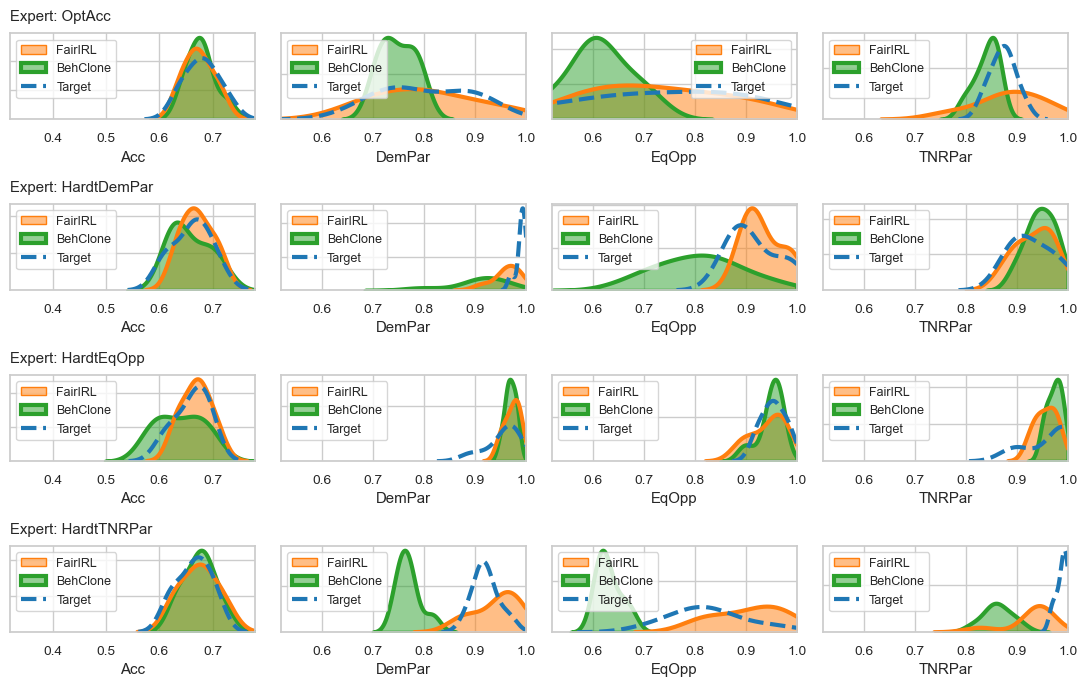

In [75]:
sns.set_style('darkgrid')
sns.set(font_scale=.9)
plt.rc('legend', fontsize=9)    # legend fontsize
sns.set_style('whitegrid')

expert_algos = [
    'OptAcc',
    'HardtDemPar',
    'HardtEqOpp',
    'HardtTNRPar',
]

perf_measures = [
        'Acc',
        'DemPar',
        'EqOpp',
        'TNRPar',
]

fig, axes = plt.subplots(len(expert_algos), len(perf_measures), figsize=(11, 7))

for expert_algo_i, expert_algo in enumerate(expert_algos):

    for measure_i, measure in enumerate(perf_measures):
        ax = axes[expert_algo_i][measure_i]
        piv = pariwise_pivots(df, expert_algo)
        
#         source_clf = piv['METRIC_VALUE']['SourceClassifier'][measure]
# #         source_clf_lbl = f"Source, med={str(np.round(source_clf.median(), 3))[1:]}"
#         source_clf_lbl = "Source"
#         sns.kdeplot(source_clf, ax=ax, label=source_clf_lbl, fill=True, alpha=.2, clip=[0, 1], color=cp[0])
#         sns.kdeplot(source_clf, ax=ax, label=None, fill=False, alpha=1, clip=[0, 1], color=cp[0])
        
        fair_irl = piv['METRIC_VALUE']['FairIRL'][measure]
#         fair_irl_lbl = f"FairIRL, med: {str(np.round(fair_irl.median(), 3))[1:]}, mean: {str(np.round(fair_irl.mean(), 3))[1:]}"
        fair_irl_lbl = "FairIRL"
        sns.kdeplot(fair_irl, ax=ax, label=fair_irl_lbl, fill=True,  alpha=.5, clip=[0, 1], color=cp[1])
        sns.kdeplot(fair_irl, ax=ax, label=None, fill=False, alpha=1, clip=[0, 1], color=cp[1], lw=3) # Plot just line
        
        beh_clone = piv['METRIC_VALUE']['BehaviorCloning'][measure]
        beh_clone_lbl = f"BehClone, med: {str(np.round(beh_clone.median(), 3))[1:]}, mean: {str(np.round(beh_clone.mean(), 3))[1:]}"
        beh_clone_lbl = "BehClone"
        sns.kdeplot(beh_clone, ax=ax, label=beh_clone_lbl, fill=True, alpha=.5, clip=[0, 1], color=cp[2], lw=3)
        
        clf_on_test = piv['METRIC_VALUE']['ClassifierTrainedOnTest'][measure]
#         clf_on_test_lbl = f"Target, med: {str(np.round(clf_on_test.median(), 3))[1:]}, mean: {str(np.round(clf_on_test.mean(), 3))[1:]}"
        clf_on_test_lbl = "Target"
#         sns.kdeplot(clf_on_test, ax=ax, label=clf_on_test_lbl, fill=True, alpha=.2, clip=[0, 1], color=cp[7], )
        sns.kdeplot(clf_on_test, ax=ax, label=clf_on_test_lbl, fill=False, alpha=1, clip=[0, 1], color=cp[0], ls='--', lw=3)

        ax.set_xlabel(measure)
        ax.set_yticklabels([])
        
        ax.set_ylabel(None)
        
        if measure_i == 0:
            ax.set_title(f"Expert: {expert_algo}", loc='left', y=1.05)
        if measure == 'Acc':
            ax.legend(loc='best')
            ax.set_xlim([.32, .78])
        if measure == 'DemPar':
            ax.legend(loc='best')
            ax.set_xlim([.52, 1])
            ax.set_ylabel(None)
        if measure == 'EqOpp':
            ax.legend(loc='best')
            ax.set_xlim([.52, 1])
            ax.set_ylabel(None)
        if measure == 'TNRPar':
            ax.legend(loc='best')
            ax.set_xlim([.52, 1])
            ax.set_ylabel(None)
            
        pass

    plt.tight_layout()
#     plt.subplots_adjust(wspace=.05)
    
pass